# Vizualize Data


## Imports and globals

In [1]:
!pip install phik
import phik
from phik import resources, report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 6.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATASET_FILENAME = "/content/drive/My Drive/ML6140  - Project/Data/enhanced_data_df2.csv"
CLEANED_OUTFILE_NAME = "/content/drive/My Drive/ML6140  - Project/Data/cleaned_data.csv"
FIGURES_FOLDER = "/content/drive/My Drive/ML6140  - Project/Data/Figures/"

pd.set_option('display.max_columns', None)

## Get Data

In [4]:
df = pd.read_csv(DATASET_FILENAME)

## View Data

In [5]:
df.shape

(5817, 88)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 88 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   incident_name                              5817 non-null   object 
 1   incident_created_year                      5817 non-null   int64  
 2   incident_created_month                     5817 non-null   int64  
 3   incident_created_day                       5817 non-null   int64  
 4   incident_created_hour                      5817 non-null   int64  
 5   incident_created_minute                    5817 non-null   int64  
 6   incident_latitude                          5817 non-null   float64
 7   incident_longitude                         5817 non-null   float64
 8   incident_geohash                           5817 non-null   object 
 9   LCD_station_id                             5817 non-null   int64  
 10  LCD_station_elevation   

In [7]:
df

incident_name  incident_created_year  \
0                      Stephens Fire                   2015   
1                          Ward Fire                   2015   
2                       Highway Fire                   2015   
3                       Forebay Fire                   2015   
4                          Bald Fire                   2015   
...                              ...                    ...   
5812  synthetic negative random 2904                   2019   
5813  synthetic negative random 2905                   2021   
5814  synthetic negative random 2906                   2022   
5815  synthetic negative random 2907                   2018   
5816  synthetic negative random 2908                   2022   

      incident_created_month  incident_created_day  incident_created_hour  \
0                          2                    24                     12   
1                          4                    13                      5   
2                          4                    18                     18   
3                          5                    11                     10   
4                          6                    10                      7   
...                      ...                   ...                    ...   
5812                       6                     1                      6   
5813                       3                     8                     12   
5814                       4                    14                      8   
5815                      12                     1                     18   
5816                       6                    25                     16   

      incident_created_minute  incident_latitude  incident_longitude  \
0                          15          41.485000         -121.851000   
1                          30          40.050833         -120.701667   
2                          12          33.884313         -117.642759   
3                          26          37.083120         -121.069630   
4                          42          41.151300         -123.829200   
...                       ...                ...                 ...   
5812                       41          39.063400         -122.372060   
5813                       13          36.192410         -118.656960   
5814                       51          37.269060         -120.906180   
5815                       33          40.377730         -123.636690   
5816                       41          41.622700         -122.567110   

     incident_geohash  LCD_station_id  LCD_station_elevation  \
0             9r3k50n           24215                 1083.0   
1             9r45v75           23225                 1611.2   
2             9qh2fbr           53175                  162.5   
3             9q9fuyz           93243                   23.8   
4             9prfn5q           24283                   64.5   
...               ...             ...                    ...   
5812          9qbypr7           93205                   18.9   
5813          9q7tgus           23149                  134.7   
5814          9qdh08w           93243                   23.8   
5815          9r0jdwd             396                  119.2   
5816          9r2ufcj           24259                  806.1   

      LCD_station_distance GHCN_station_id  GHCN_station_elevation  \
0                43.235962     USC00045449                   985.4   
1                86.141091     USC00047195                  1042.4   
2                 4.007019     USW00053175                   162.5   
3                23.915758     USC00045118                    36.6   
4                30.054588     USC00049694                   141.4   
...                    ...             ...                     ...   
5812             69.461630     USC00041806                   411.2   
5813             40.688547     USC00048917                   347.5   
5814              4.030390     USW00093243                    23.8   
5815   

In [8]:
df.groupby("class_label").describe()

incident_created_year                                         \
                            count         mean       std     min     25%   
class_label                                                                
0                          3878.0  2018.595152  2.487544  2015.0  2016.0   
1                          1939.0  2018.773595  2.159961  2015.0  2017.0   

                                    incident_created_month            \
                50%     75%     max                  count      mean   
class_label                                                            
0            2019.0  2021.0  2023.0                 3878.0  6.355338   
1            2018.0  2020.0  2023.0                 1939.0  7.266117   

                                                incident_created_day  \
                  std  min  25%  50%  75%   max                count   
class_label                                                            
0            3.396593  1.0  3.0  6.0  9.0  12.0               3878.0   
1            1.773367  1.0  6.0  7.0  8.0  12.0               1939.0   

                                                              \
                  mean       std  min  25%   50%   75%   max   
class_label                                                    
0            15.674317  8.846463  1.0  8.0  16.0  23.0  31.0   
1            15.471377  8.959580  1.0  8.0  15.0  23.0  31.0   

            incident_created_hour                                              \
                            count       mean       std  min   25%   50%   75%   
class_label                                                                     
0                          3878.0  11.605209  6.897955  0.0   6.0  12.0  18.0   
1                          1939.0  14.108303  3.950628  0.0  12.0  14.0  16.0   

                  incident_created_minute                                   \
              max                   count       mean        std  min   25%   
class_label                                                                  
0            23.0                  3878.0  29.538680  17.509227  0.0  14.0   
1            23.0                  1939.0  28.610108  17.606425  0.0  14.0   

                              incident_latitude                       \
              50%   75%   max             count       mean       std   
class_label                                                            
0            30.0  45.0  59.0            3878.0  37.254243  2.563973   
1            30.0  44.0  59.0            1939.0  37.215974  2.574588   

                                                                    \
                   min        25%        50%        75%        max   
class_label                                                          
0            32.569660  35.042517  37.091509  39.420405  42.006310   
1            32.557546  34.849455  37.373970  39.298927  41.999341   

            incident_longitude                                               \
                         count        mean       std        min         25%   
class_label                                                                   
0                       3878.0 -119.794218  2.388510 -124.34718 -121.633994   
1                       1939.0 -120.243190  2.031573 -124.19954 -121.821125   

                                                LCD_station_id                \
                    50%         75%         max          count          mean   
class_label                                                                    
0           -120.230255 -117.815027 -114.286910         3878.0  40542.763280   
1           -120.670311 -118.714712 -114.484173         1939.0  42435.592058   

                                                                      \
                      std    min      25%      50%      75%      max   
class_label                                                            
0            35556.363495  115.0  23119.0  23275.0  93121.0  94299

## Visualize Data

### Histograms

In [9]:
def hist_discrete_feature_distribution_total(df, feature_name, color="b"):
  ticklabels = df[feature_name].unique()
  num_bins = len(ticklabels)
  fig, ax = plt.subplots()

  # df must be global
  n, bins, patches = ax.hist(df[feature_name], num_bins, color=color)

  ax.set_xlabel(feature_name)
  ax.set_ylabel("num examples")
  ax.set_title(f"distribution of examples by {feature_name}")
  ax.xaxis.set(ticks=range(1, num_bins + 1), ticklabels=ticklabels)
  # plt.show()
  return fig

In [10]:
def hist_discrete_feature_distribution_by_label(df, feature_name, labelTicks=False, stacked=True):
  ticklabels = df[feature_name].unique()
  num_bins = len(ticklabels)
  fig, ax = plt.subplots()

  no_fire_df = df[df["class_label"] == 0][feature_name]
  fire_df = df[df["class_label"] == 1][feature_name]
  colors = ["b", "r"]
  names = ["no fires", "fires"]

  # df must be global
  n, bins, patches = ax.hist([no_fire_df, fire_df], num_bins, label=names, color=colors, histtype="bar", stacked=stacked)

  ax.set_xlabel(feature_name)
  ax.set_ylabel("num examples")
  ax.set_title(f"distribution of examples by {feature_name}")
  if labelTicks:
    ax.xaxis.set(ticks=range(num_bins), ticklabels=["no fire", "fire"])
  ax.legend(facecolor="white")
  plt.show()
  # return fig
  # plt.savefig(FIGURES_FOLDER + f"FeatureDistributionHistograms/{label}.svg", format="svg")

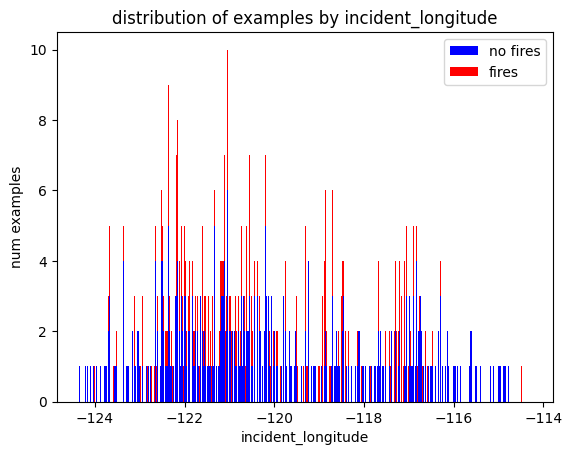

In [11]:
hist_discrete_feature_distribution_by_label(df, "incident_longitude")

In [12]:
# Can't open too many plots at once
features_0_20 = list(df.columns)[:20]
features_20_40 = list(df.columns)[20:40]
features_40_60 = list(df.columns)[40:60]
features_60_ = list(df.columns)[60:]

  0%|          | 0/20 [00:00<?, ?it/s]

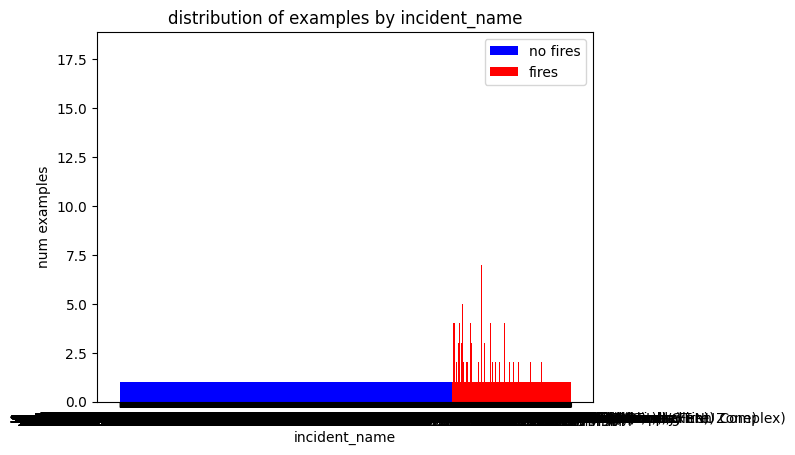

  5%|▌         | 1/20 [01:23<26:19, 83.16s/it]

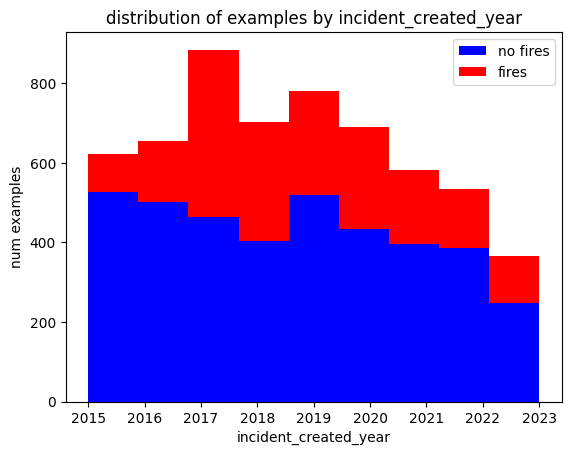

 10%|█         | 2/20 [01:23<10:19, 34.43s/it]

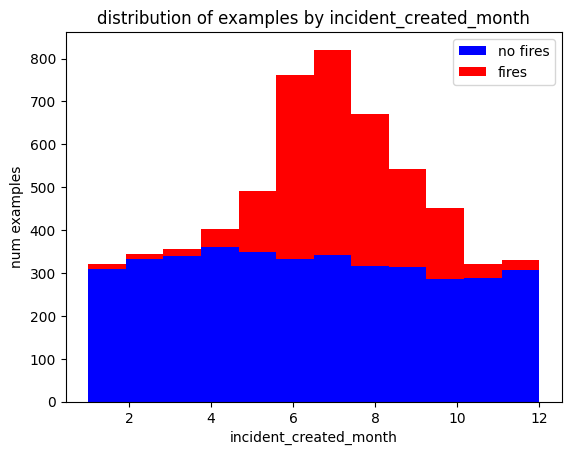

 15%|█▌        | 3/20 [01:23<05:22, 18.95s/it]

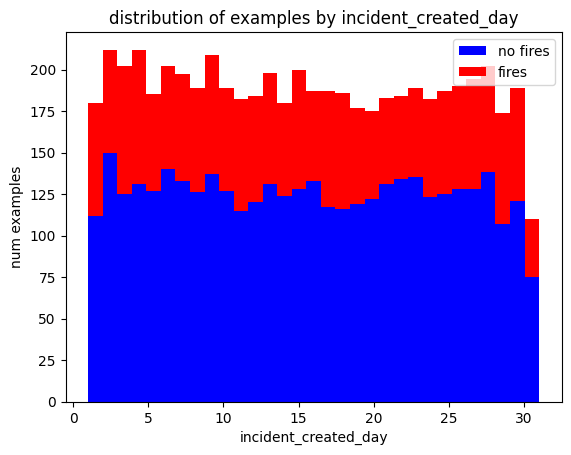

 20%|██        | 4/20 [01:24<03:06, 11.63s/it]

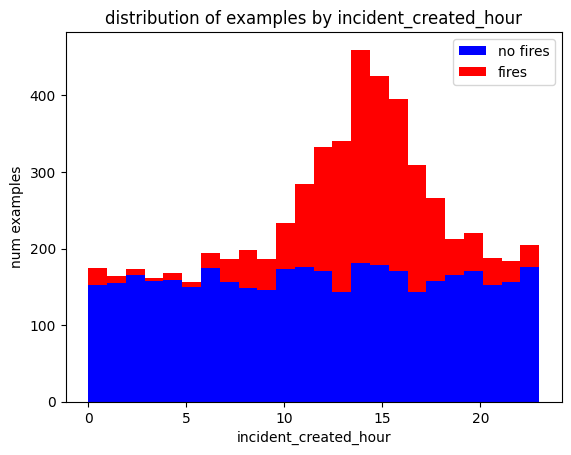

 25%|██▌       | 5/20 [01:24<01:54,  7.61s/it]

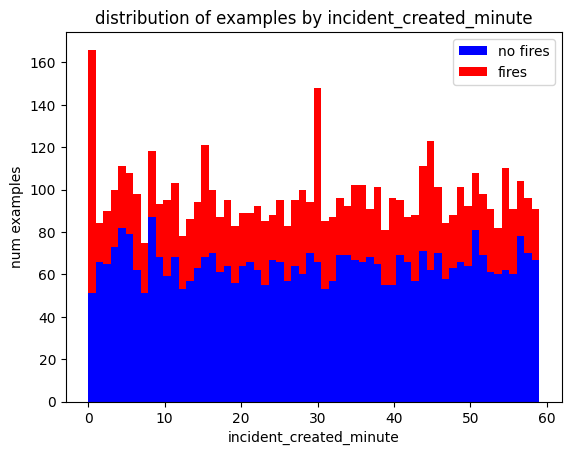

 30%|███       | 6/20 [01:25<01:12,  5.18s/it]

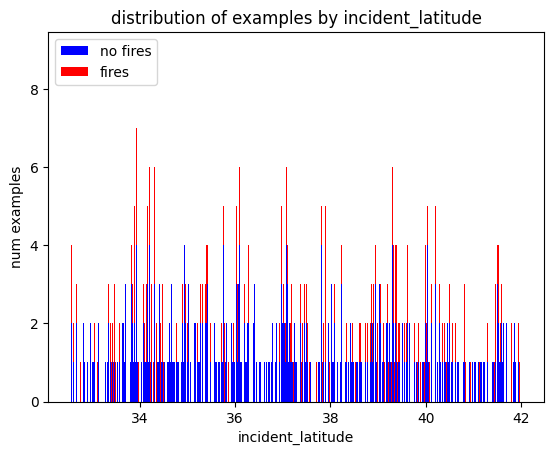

 35%|███▌      | 7/20 [01:48<02:22, 10.97s/it]

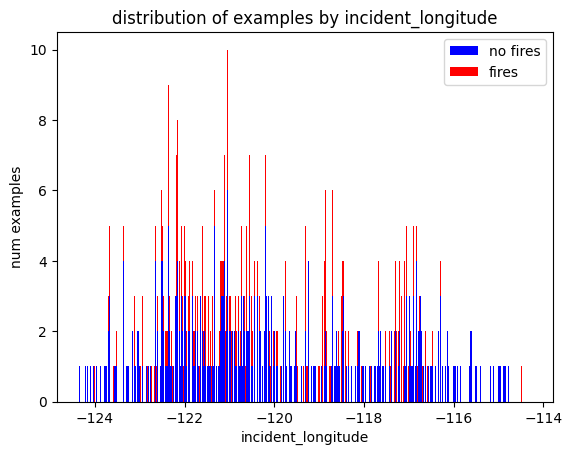

 40%|████      | 8/20 [02:08<02:48, 14.08s/it]

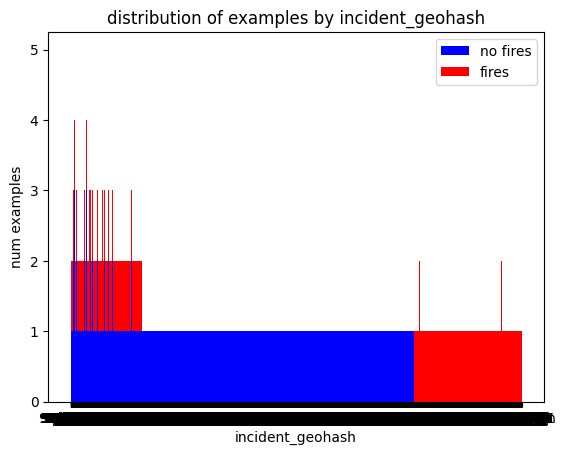

 45%|████▌     | 9/20 [03:06<05:03, 27.57s/it]

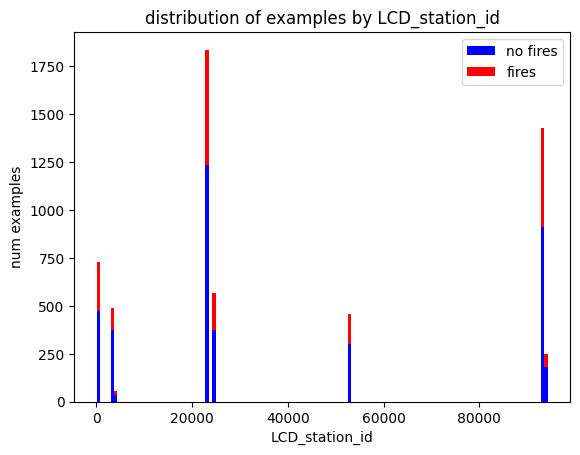

 50%|█████     | 10/20 [03:07<03:13, 19.34s/it]

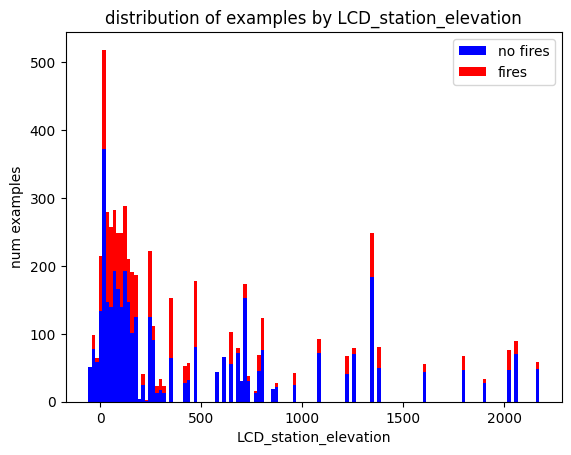

 55%|█████▌    | 11/20 [03:08<02:03, 13.72s/it]

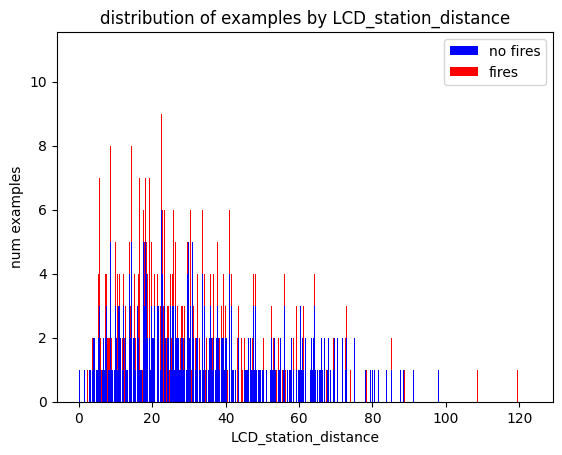

 60%|██████    | 12/20 [03:30<02:10, 16.29s/it]

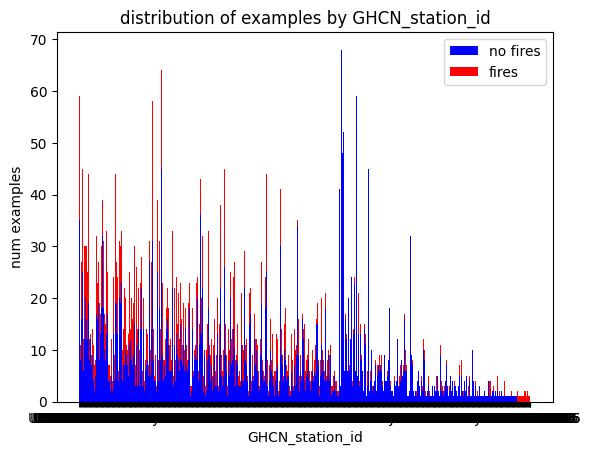

 65%|██████▌   | 13/20 [03:34<01:29, 12.77s/it]

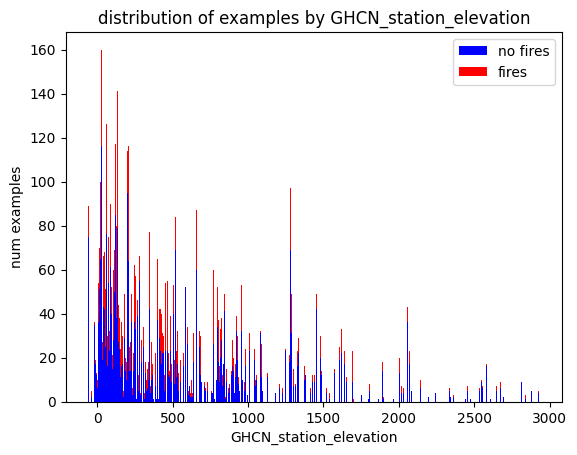

 70%|███████   | 14/20 [03:37<00:58,  9.73s/it]

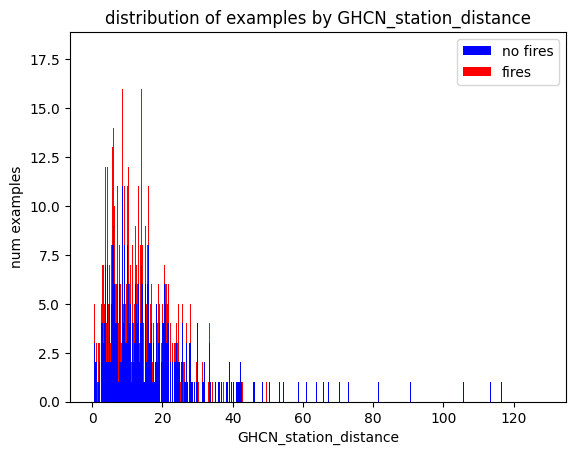

 75%|███████▌  | 15/20 [03:56<01:02, 12.59s/it]

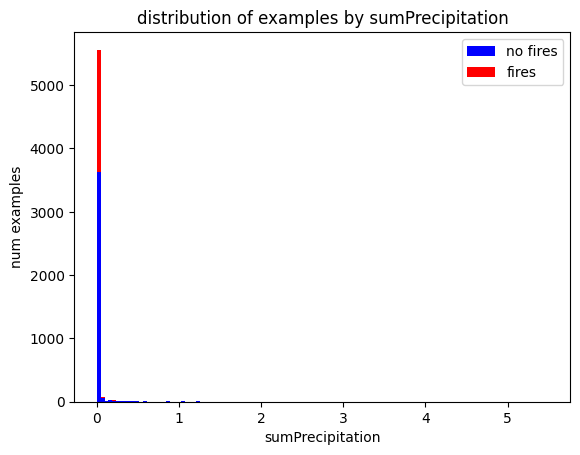

 80%|████████  | 16/20 [03:57<00:36,  9.07s/it]

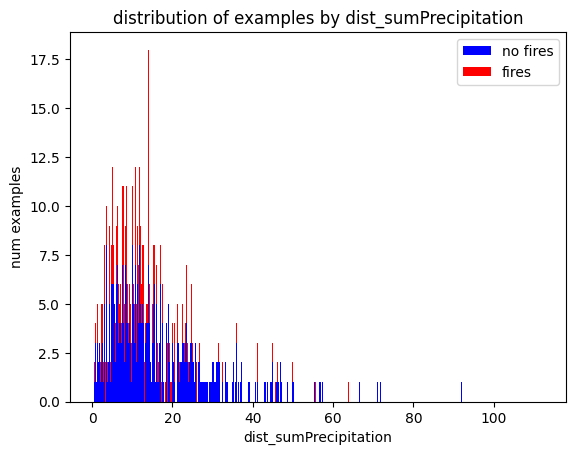

 85%|████████▌ | 17/20 [04:18<00:38, 12.70s/it]

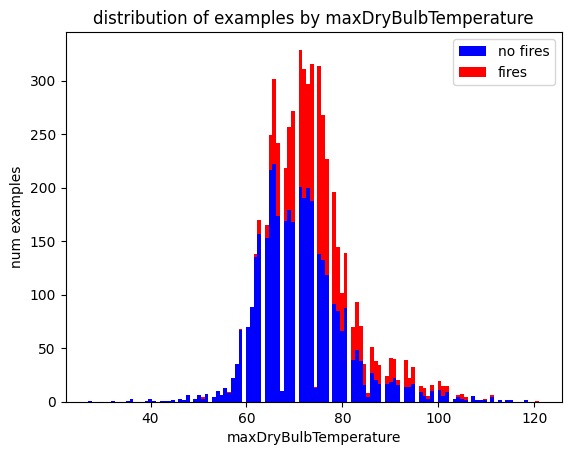

 90%|█████████ | 18/20 [04:19<00:18,  9.17s/it]

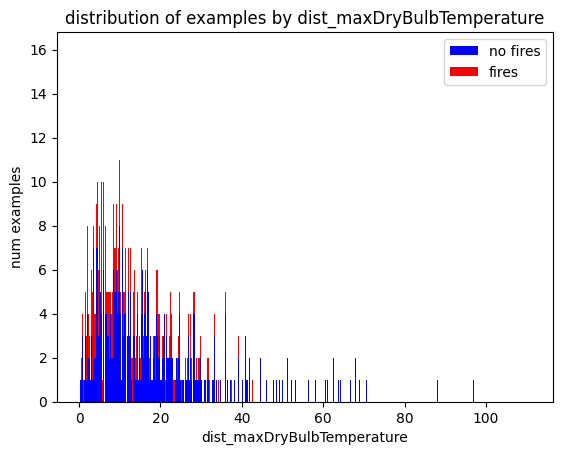

 95%|█████████▌| 19/20 [04:40<00:12, 12.72s/it]

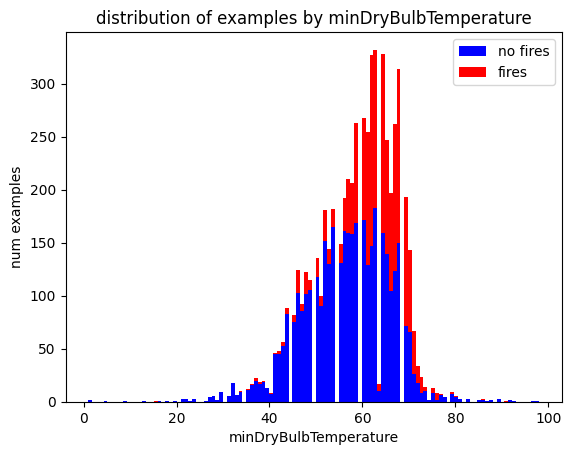

100%|██████████| 20/20 [04:41<00:00, 14.07s/it]


In [13]:
hists_0_20 = {}
for label in tqdm(features_0_20):
  hists_0_20[label] = hist_discrete_feature_distribution_by_label(df, label)

  0%|          | 0/20 [00:00<?, ?it/s]

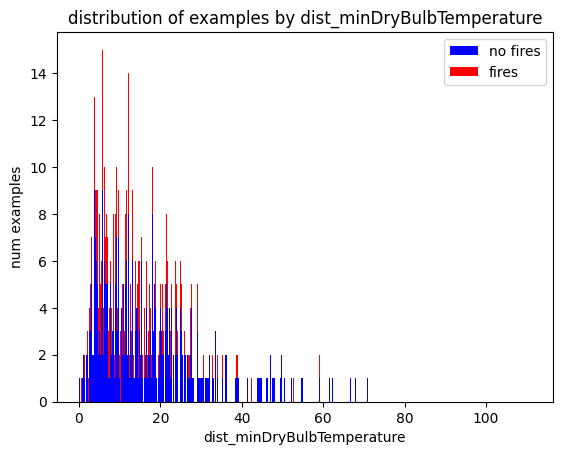

  5%|▌         | 1/20 [00:19<06:11, 19.55s/it]

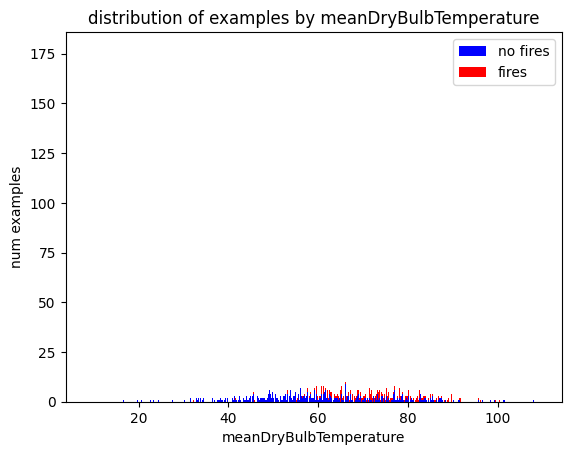

 10%|█         | 2/20 [00:36<05:21, 17.87s/it]

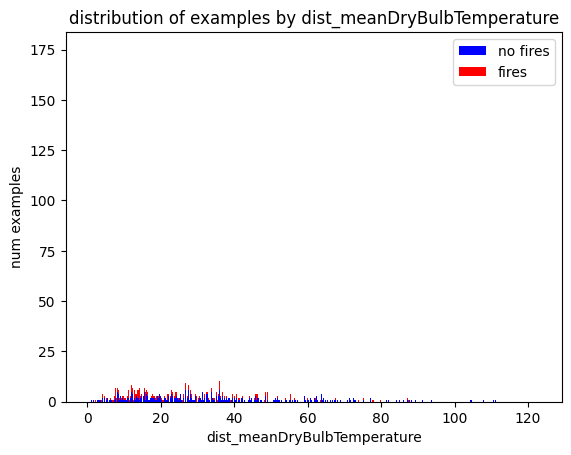

 15%|█▌        | 3/20 [00:55<05:10, 18.28s/it]

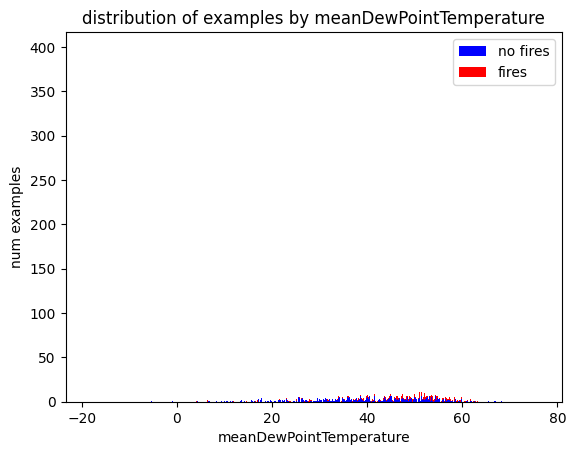

 20%|██        | 4/20 [01:09<04:31, 16.96s/it]

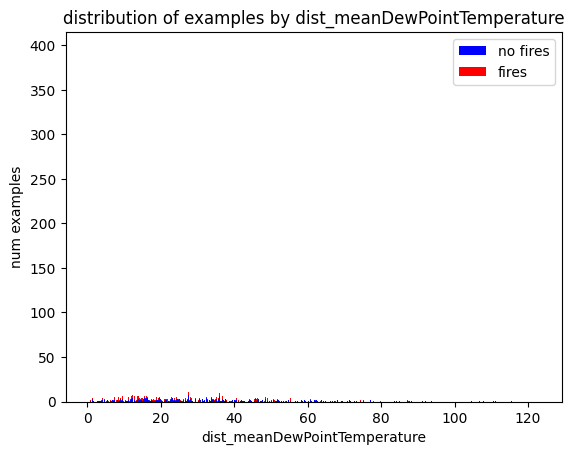

 25%|██▌       | 5/20 [01:27<04:16, 17.13s/it]

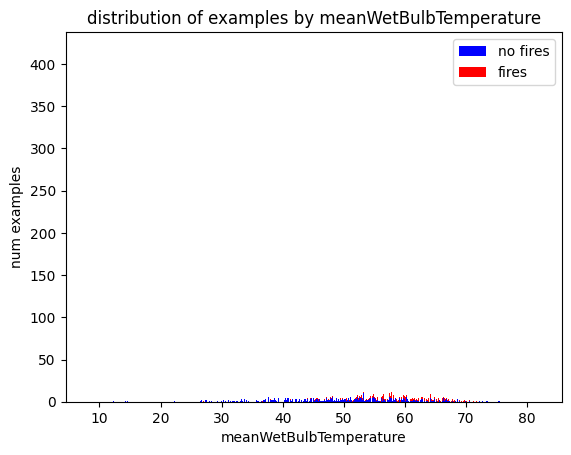

 30%|███       | 6/20 [01:41<03:46, 16.16s/it]

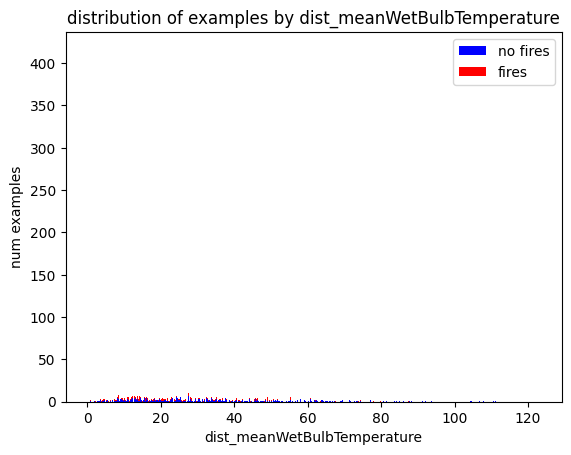

 35%|███▌      | 7/20 [01:59<03:36, 16.67s/it]

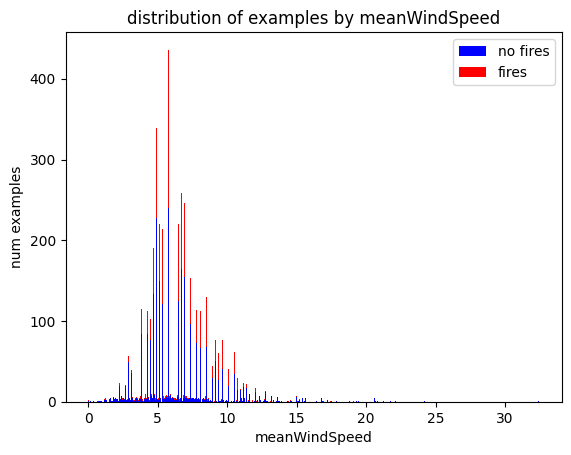

 40%|████      | 8/20 [02:02<02:27, 12.33s/it]

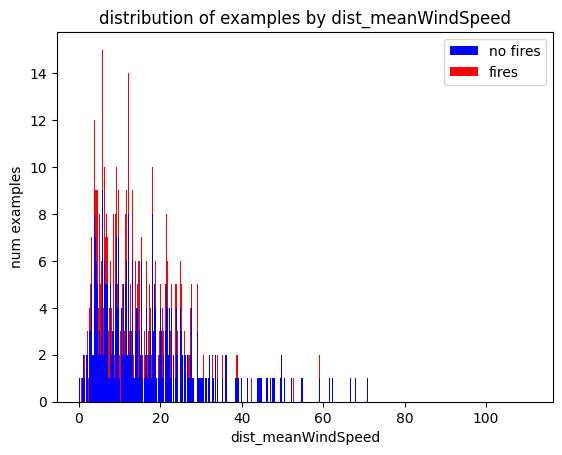

 45%|████▌     | 9/20 [02:22<02:42, 14.79s/it]

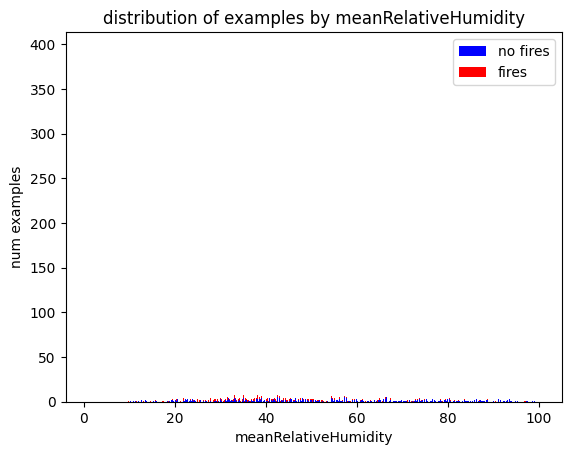

 50%|█████     | 10/20 [02:39<02:33, 15.35s/it]

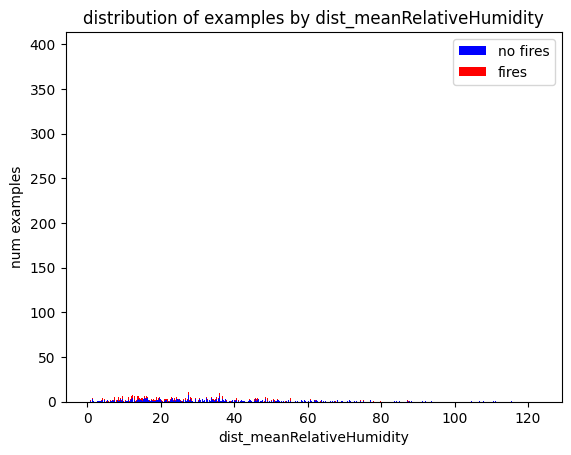

 55%|█████▌    | 11/20 [02:57<02:26, 16.26s/it]

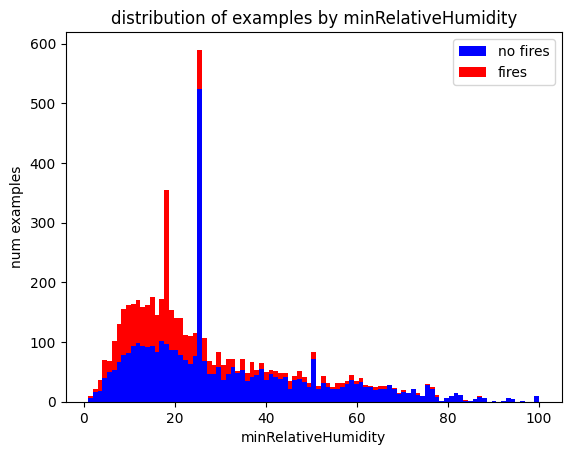

 60%|██████    | 12/20 [02:58<01:32, 11.57s/it]

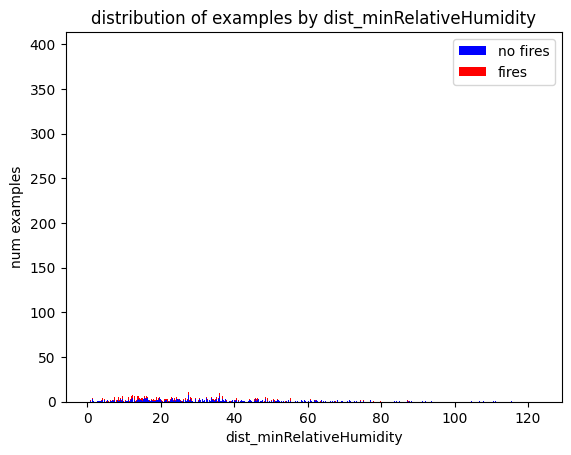

 65%|██████▌   | 13/20 [03:17<01:36, 13.84s/it]

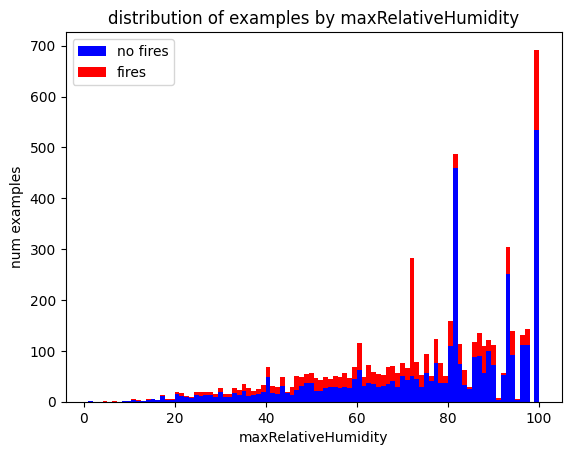

 70%|███████   | 14/20 [03:18<00:58,  9.83s/it]

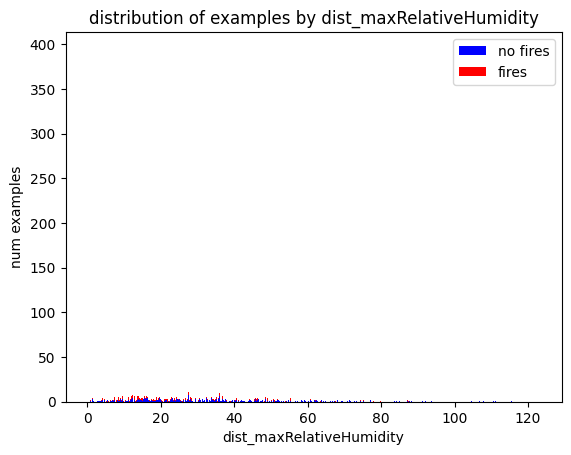

 75%|███████▌  | 15/20 [03:36<01:01, 12.40s/it]

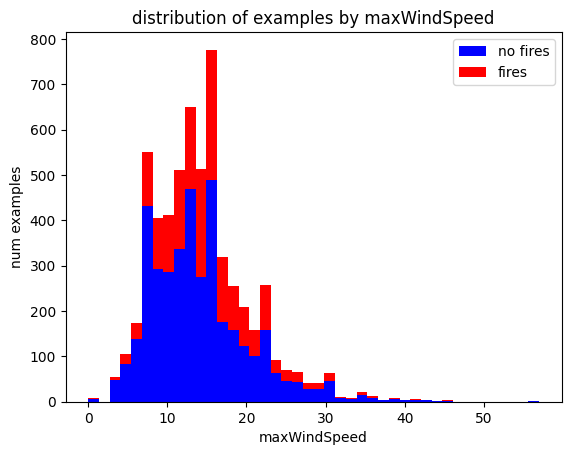

 80%|████████  | 16/20 [03:36<00:35,  8.79s/it]

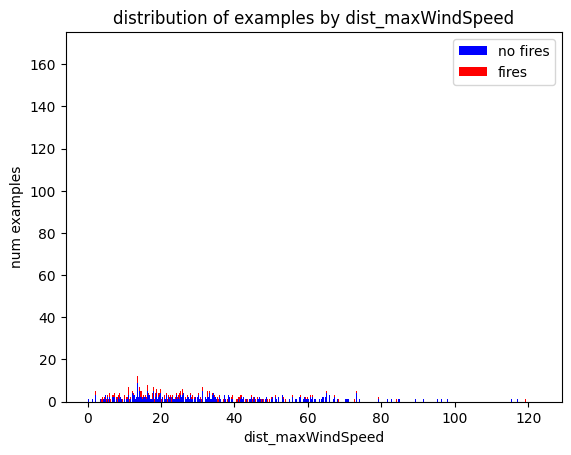

 85%|████████▌ | 17/20 [03:55<00:35, 11.92s/it]

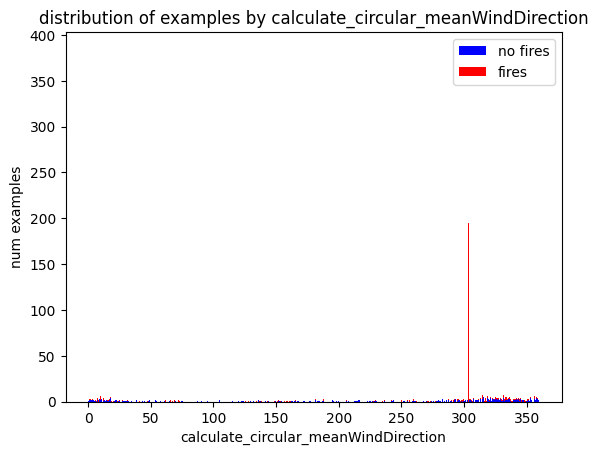

 90%|█████████ | 18/20 [04:16<00:29, 14.54s/it]

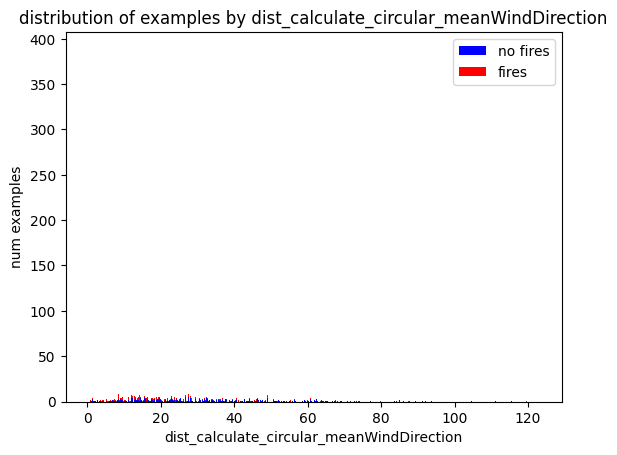

 95%|█████████▌| 19/20 [04:34<00:15, 15.46s/it]

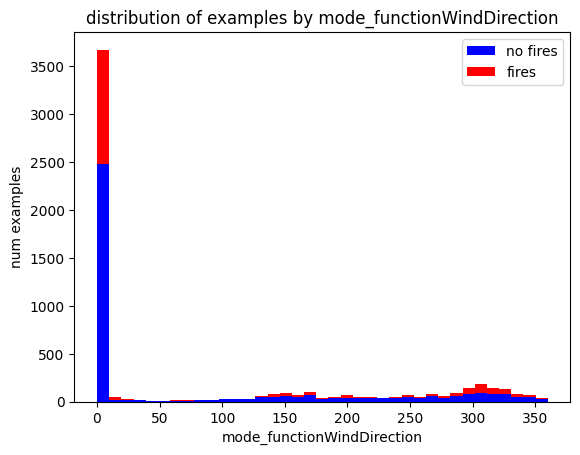

100%|██████████| 20/20 [04:34<00:00, 13.74s/it]


In [14]:
hists_20_40 = {}
for label in tqdm(features_20_40):
  hists_20_40[label] = hist_discrete_feature_distribution_by_label(df, label)

  0%|          | 0/20 [00:00<?, ?it/s]

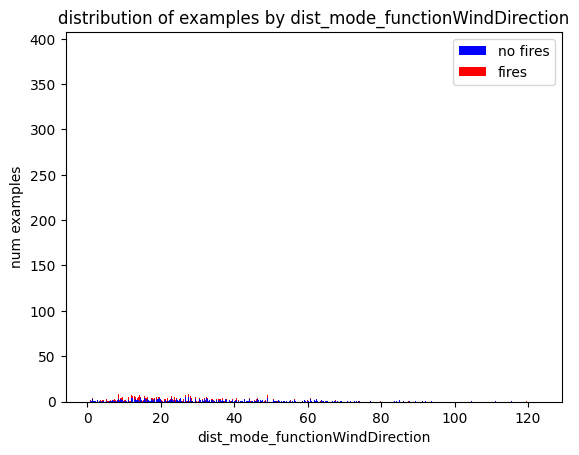

  5%|▌         | 1/20 [00:18<05:42, 18.01s/it]

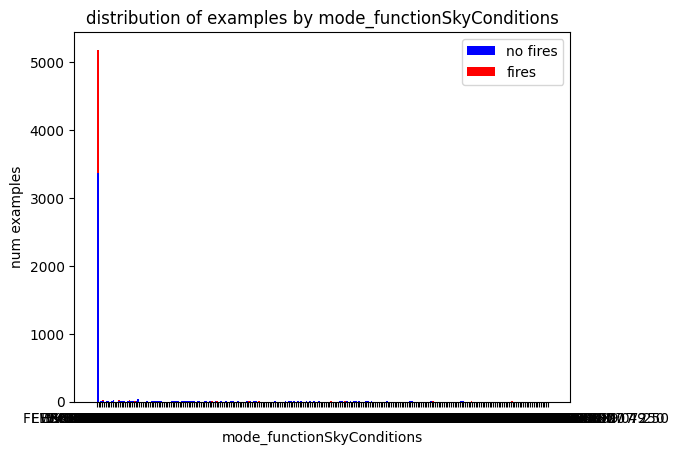

 10%|█         | 2/20 [00:22<02:58,  9.94s/it]

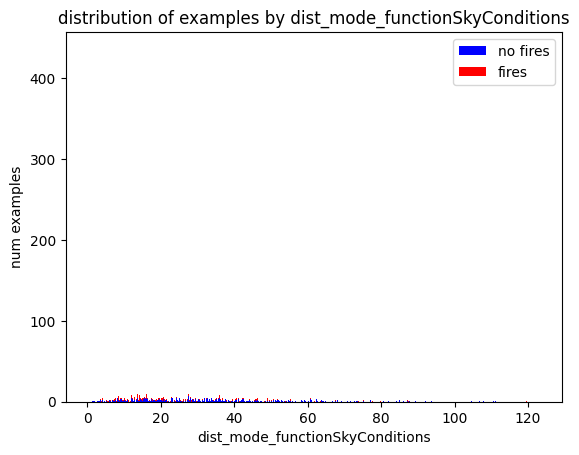

 15%|█▌        | 3/20 [00:40<03:56, 13.92s/it]

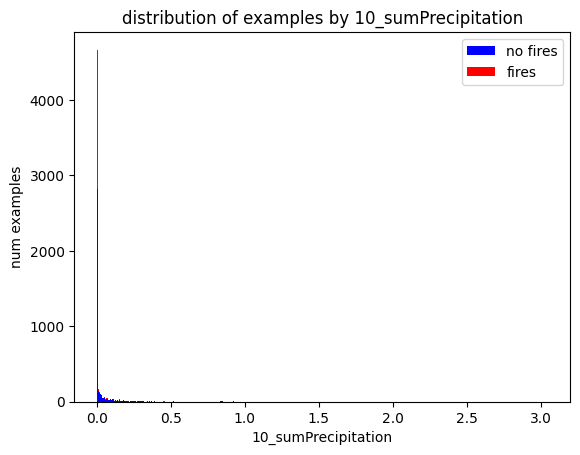

 20%|██        | 4/20 [00:42<02:25,  9.07s/it]

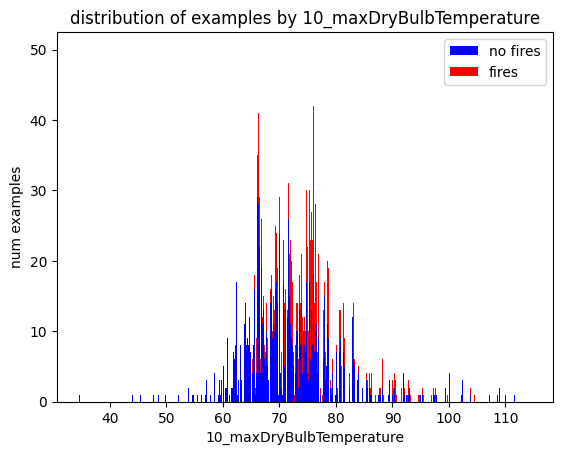

 25%|██▌       | 5/20 [00:49<02:03,  8.21s/it]

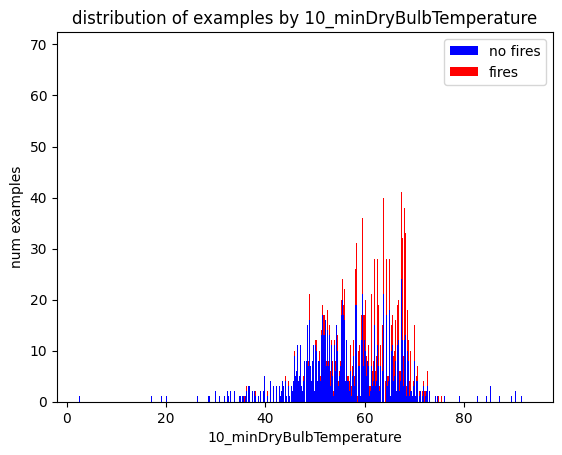

 30%|███       | 6/20 [00:57<01:56,  8.29s/it]

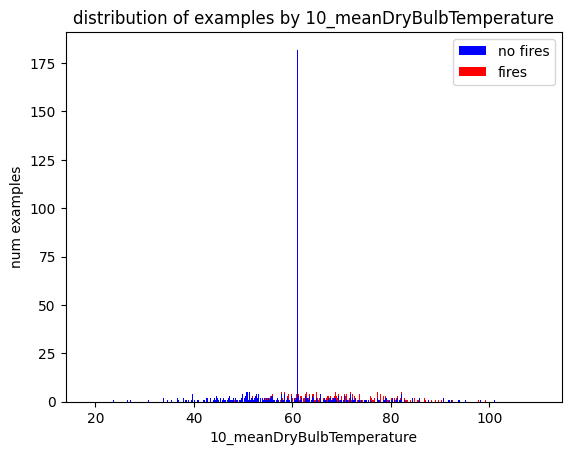

 35%|███▌      | 7/20 [01:19<02:44, 12.68s/it]

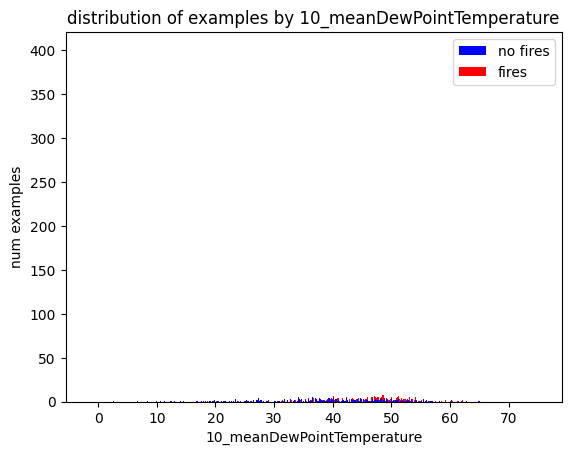

 40%|████      | 8/20 [01:40<03:02, 15.22s/it]

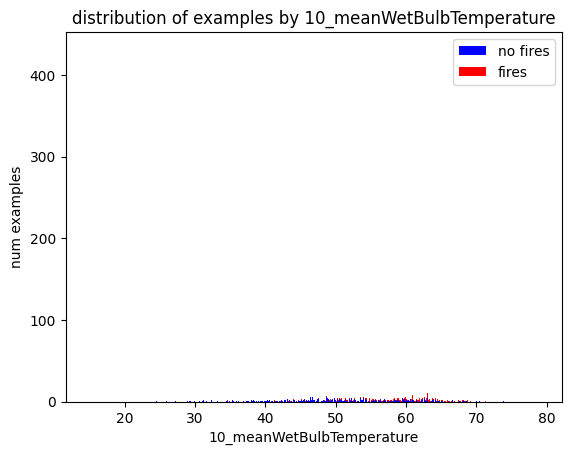

 45%|████▌     | 9/20 [02:02<03:11, 17.37s/it]

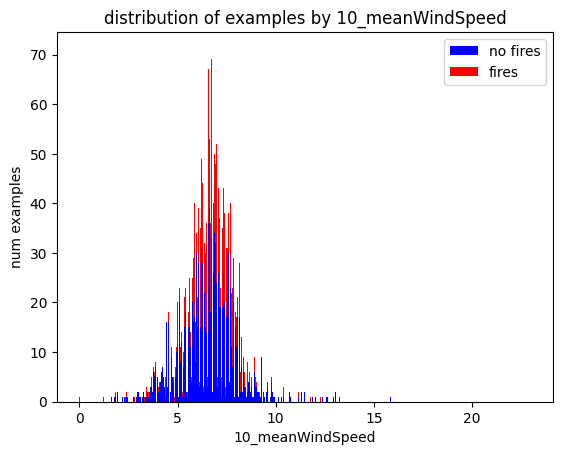

 50%|█████     | 10/20 [02:08<02:18, 13.89s/it]

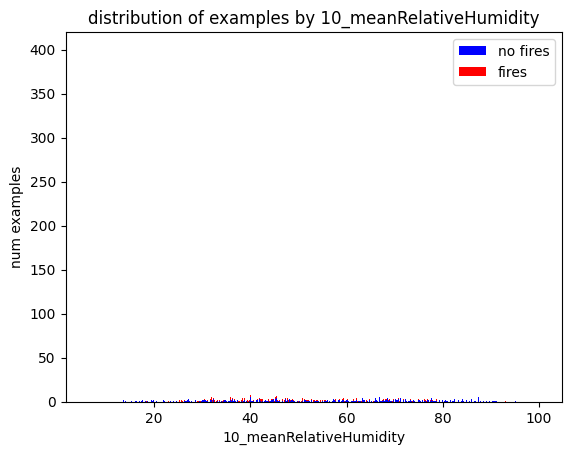

 55%|█████▌    | 11/20 [02:28<02:22, 15.80s/it]

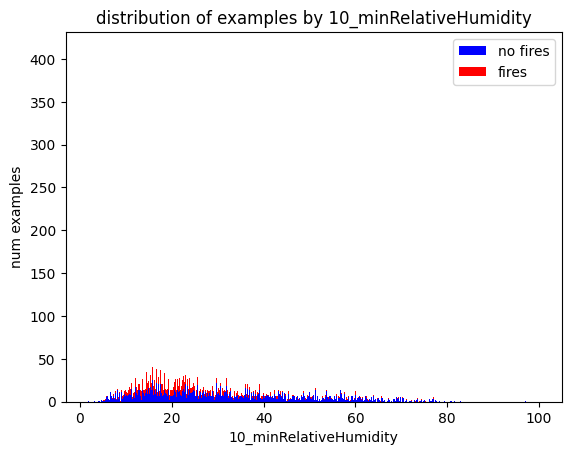

 60%|██████    | 12/20 [02:31<01:35, 11.89s/it]

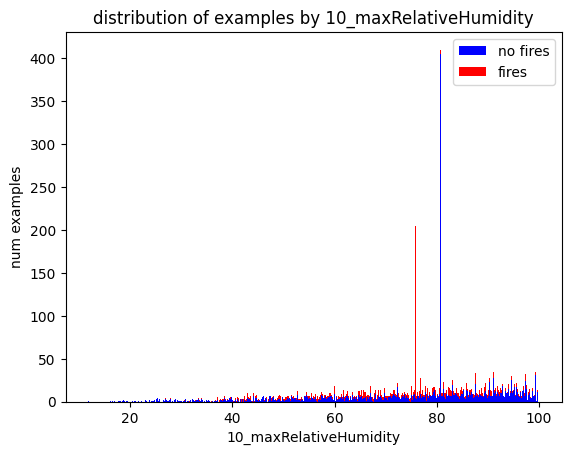

 65%|██████▌   | 13/20 [02:36<01:09,  9.89s/it]

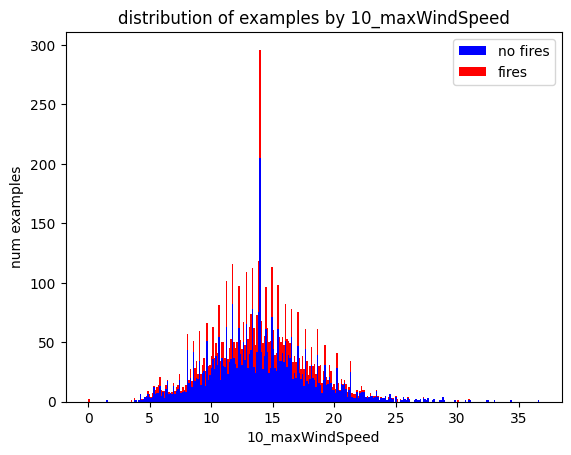

 70%|███████   | 14/20 [02:38<00:44,  7.39s/it]

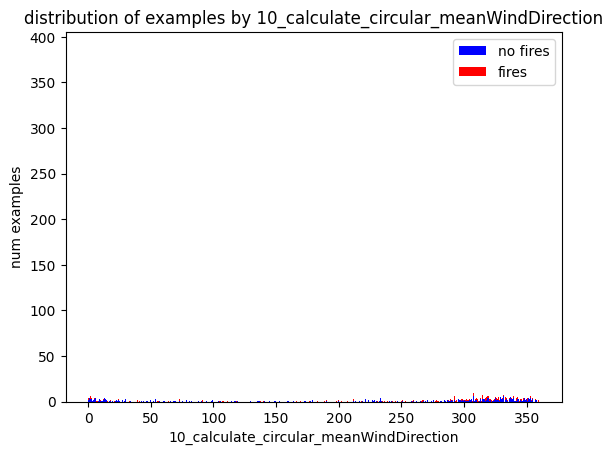

 75%|███████▌  | 15/20 [02:59<00:57, 11.49s/it]

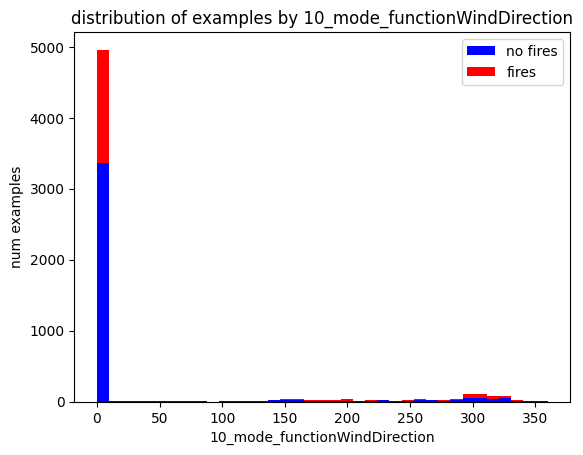

 80%|████████  | 16/20 [02:59<00:32,  8.14s/it]

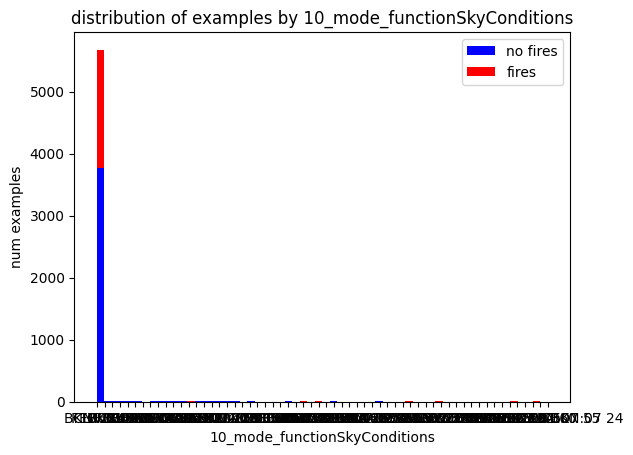

 85%|████████▌ | 17/20 [03:00<00:17,  5.91s/it]

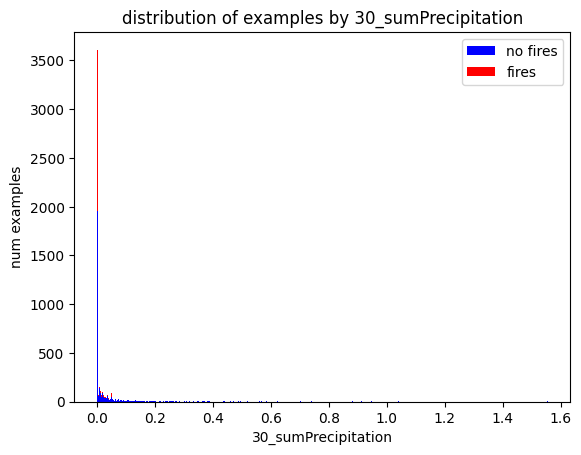

 90%|█████████ | 18/20 [03:03<00:10,  5.12s/it]

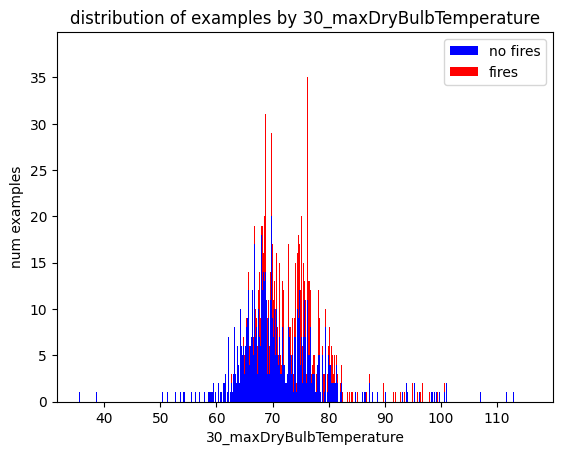

 95%|█████████▌| 19/20 [03:14<00:06,  6.91s/it]

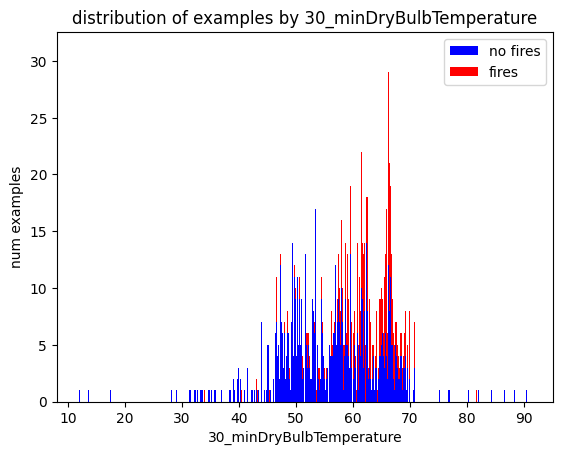

100%|██████████| 20/20 [03:25<00:00, 10.30s/it]


In [15]:
hists_40_60 = {}
for label in tqdm(features_40_60):
  hists_40_60[label] = hist_discrete_feature_distribution_by_label(df, label)

  0%|          | 0/28 [00:00<?, ?it/s]

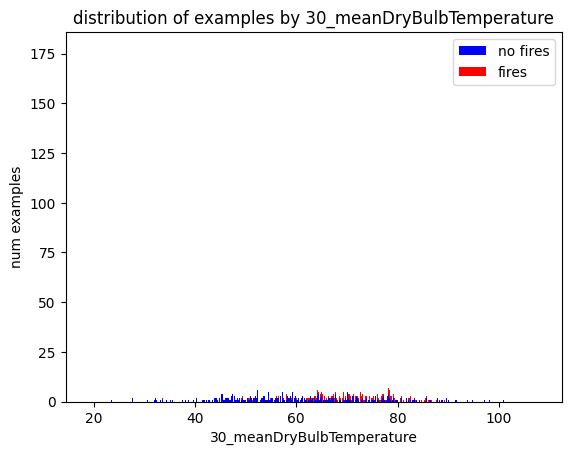

  4%|▎         | 1/28 [00:23<10:31, 23.38s/it]

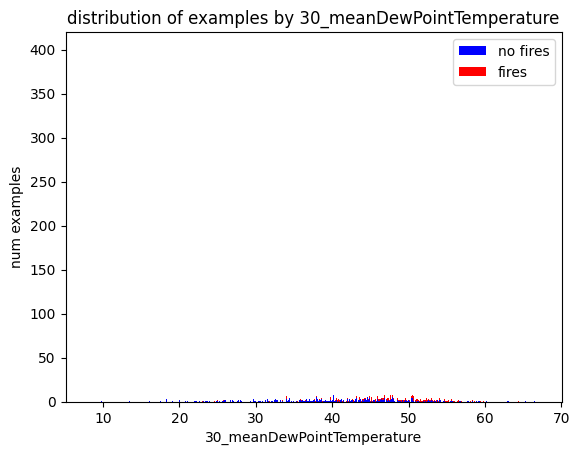

  7%|▋         | 2/28 [00:43<09:20, 21.56s/it]

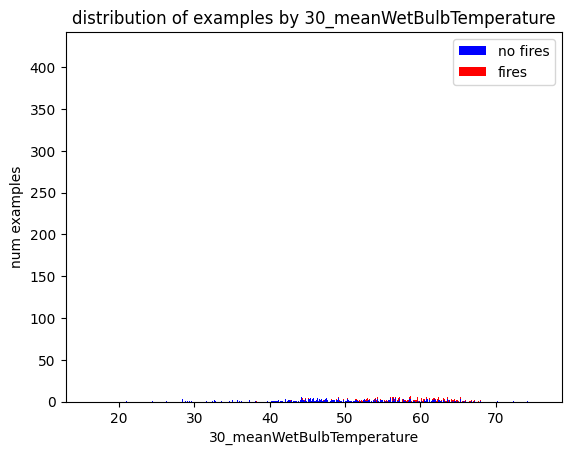

 11%|█         | 3/28 [01:04<08:53, 21.35s/it]

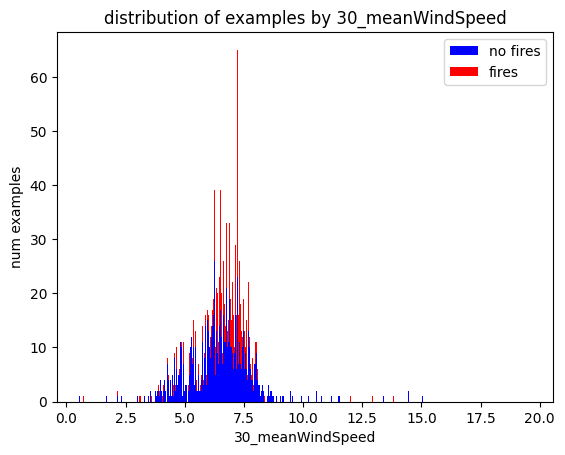

 14%|█▍        | 4/28 [01:14<06:39, 16.63s/it]

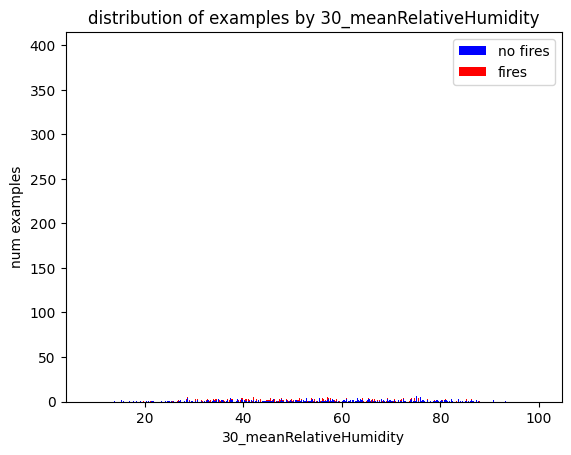

 18%|█▊        | 5/28 [01:34<06:53, 17.96s/it]

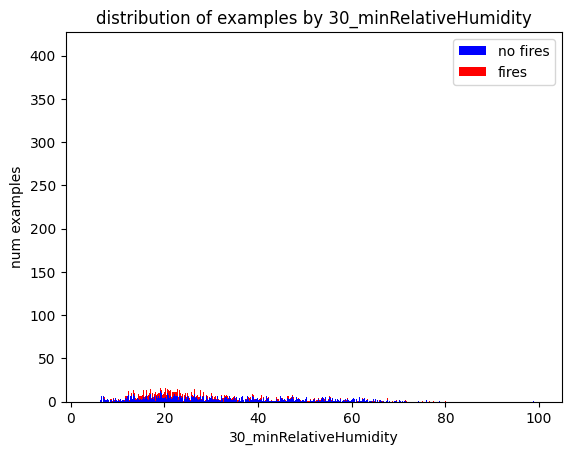

 21%|██▏       | 6/28 [01:43<05:30, 15.00s/it]

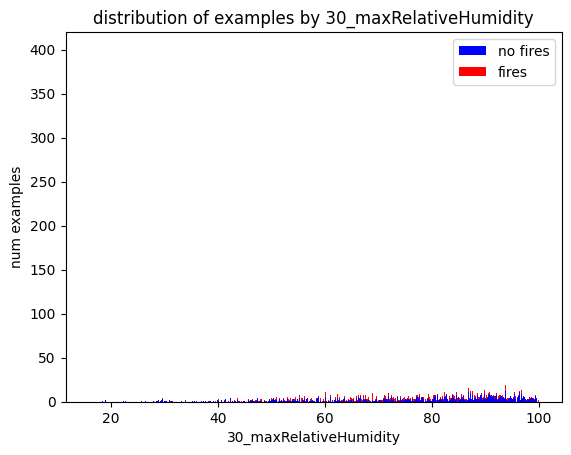

 25%|██▌       | 7/28 [01:50<04:20, 12.40s/it]

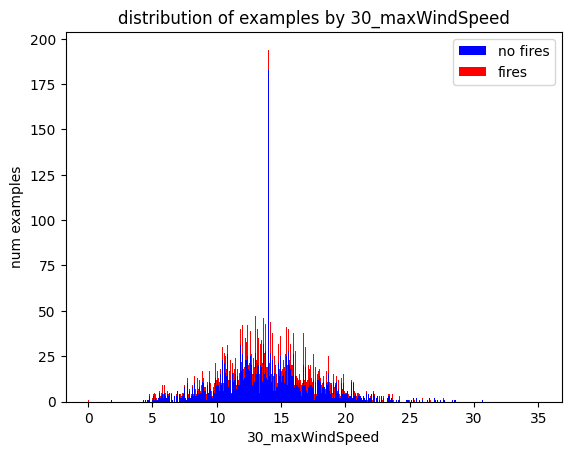

 29%|██▊       | 8/28 [01:54<03:12,  9.64s/it]

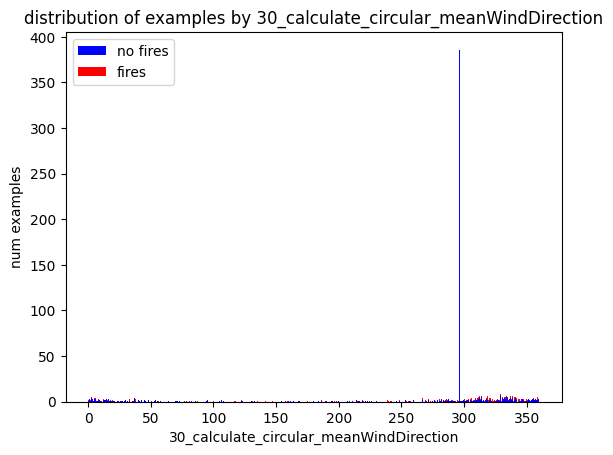

 32%|███▏      | 9/28 [02:17<04:21, 13.76s/it]

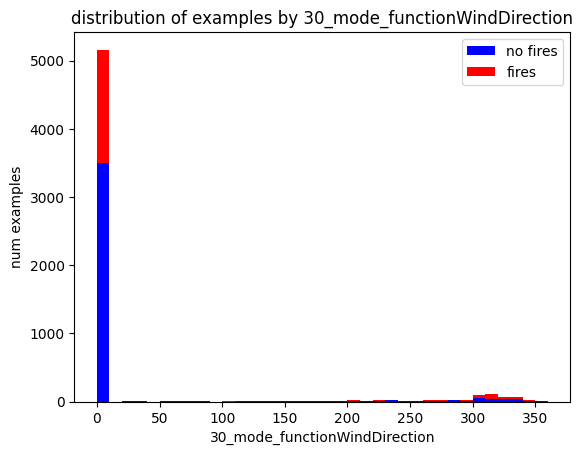

 36%|███▌      | 10/28 [02:18<02:57,  9.84s/it]

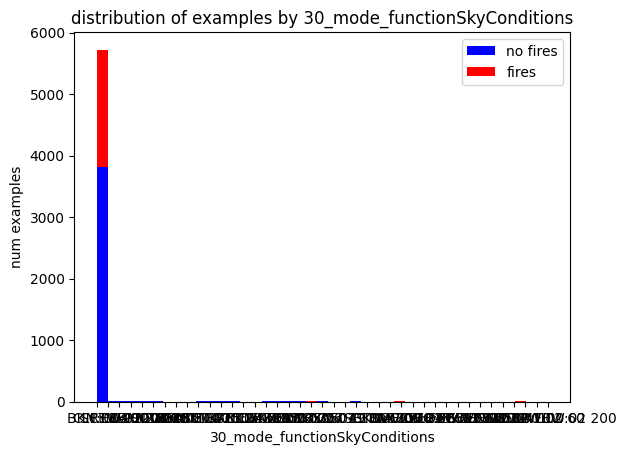

 39%|███▉      | 11/28 [02:18<01:59,  7.00s/it]

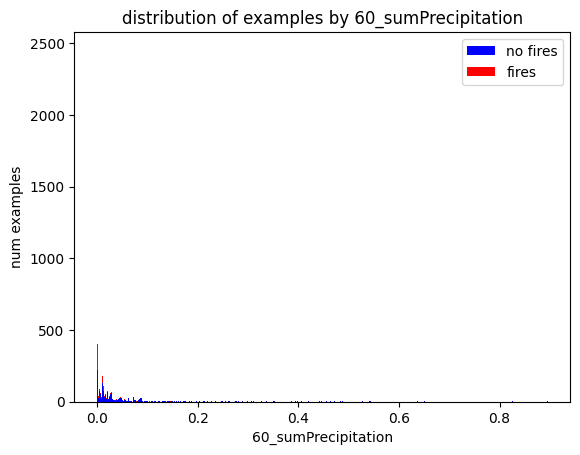

 43%|████▎     | 12/28 [02:22<01:34,  5.93s/it]

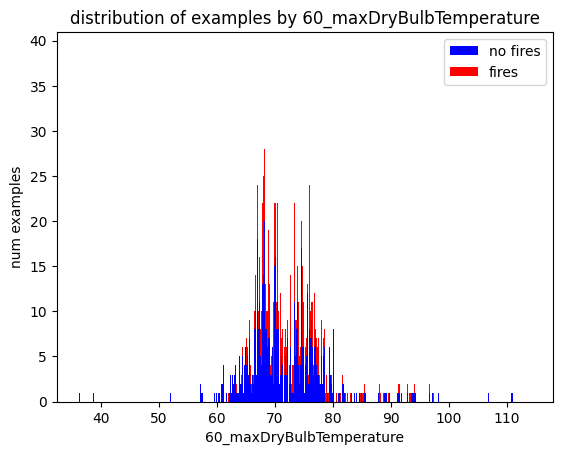

 46%|████▋     | 13/28 [02:35<02:00,  8.01s/it]

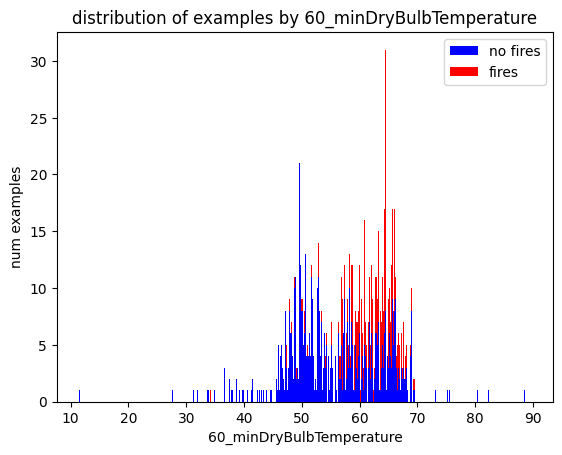

 50%|█████     | 14/28 [02:47<02:08,  9.20s/it]

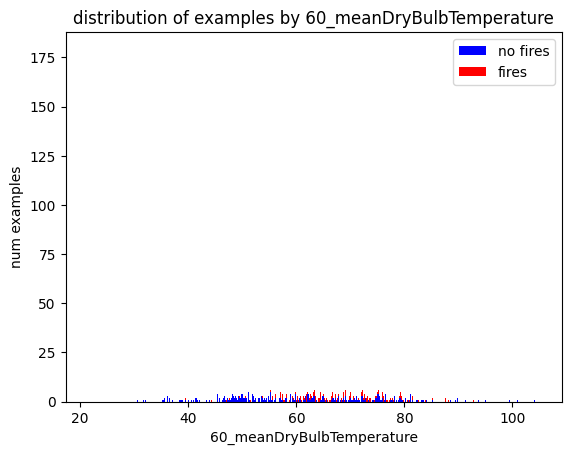

 54%|█████▎    | 15/28 [03:10<02:54, 13.41s/it]

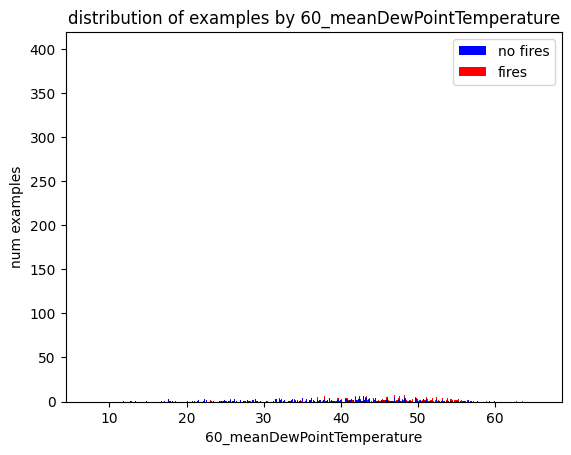

 57%|█████▋    | 16/28 [03:30<03:06, 15.56s/it]

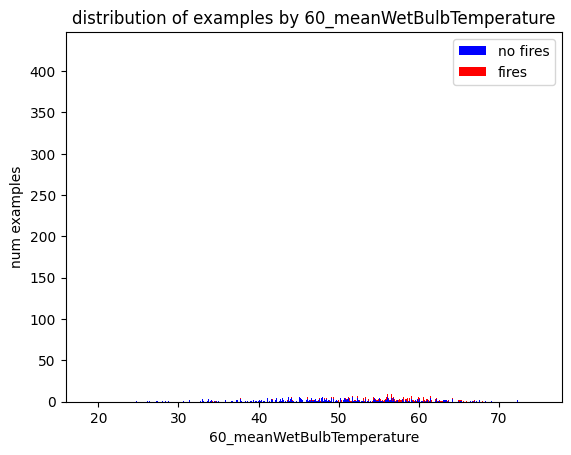

 61%|██████    | 17/28 [03:51<03:06, 16.97s/it]

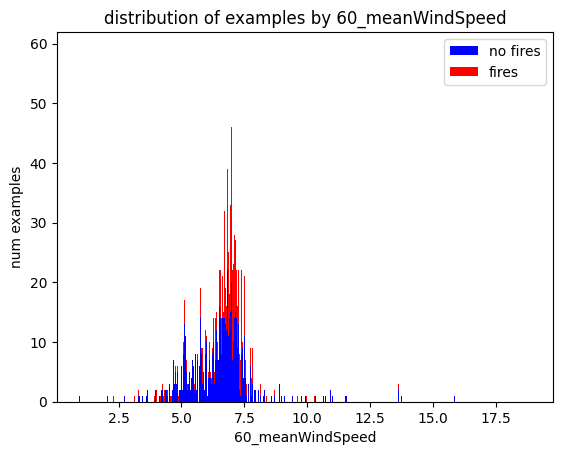

 64%|██████▍   | 18/28 [04:02<02:31, 15.14s/it]

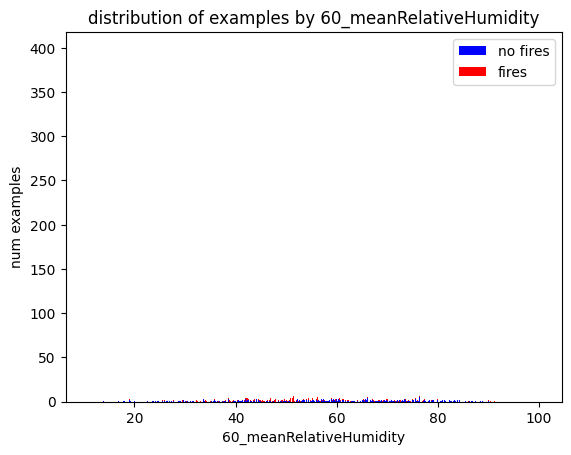

 68%|██████▊   | 19/28 [04:22<02:29, 16.65s/it]

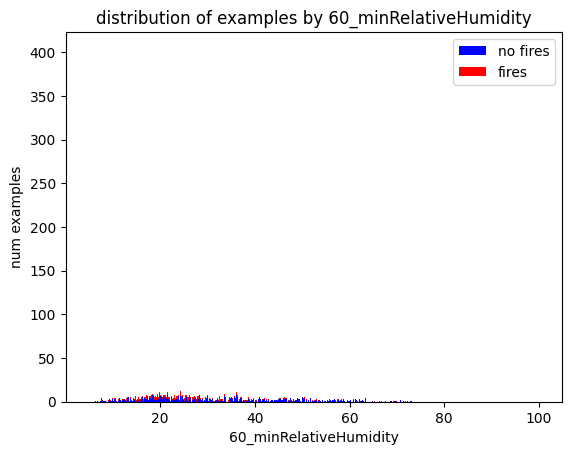

 71%|███████▏  | 20/28 [04:34<02:03, 15.48s/it]

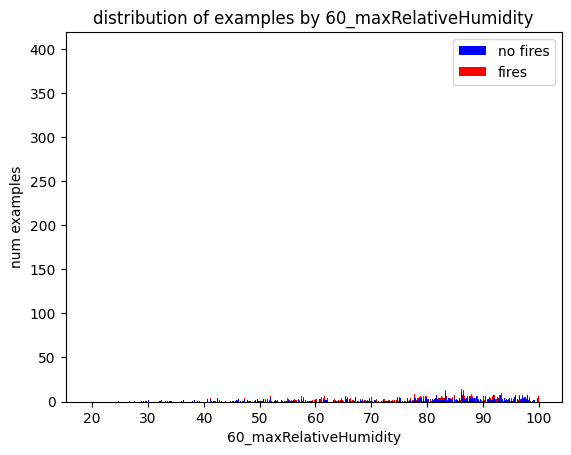

 75%|███████▌  | 21/28 [04:48<01:44, 14.88s/it]

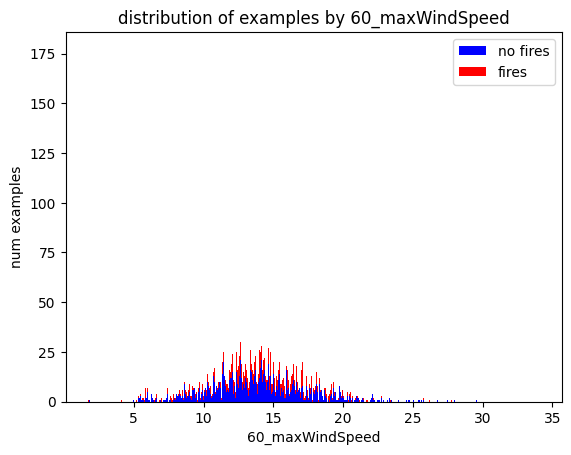

 79%|███████▊  | 22/28 [04:53<01:12, 12.01s/it]

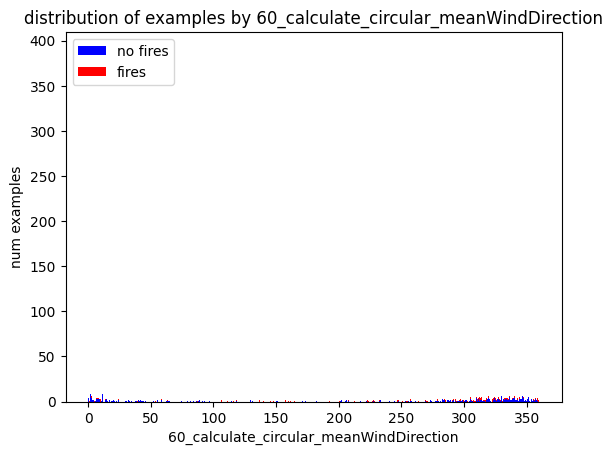

 82%|████████▏ | 23/28 [05:13<01:12, 14.47s/it]

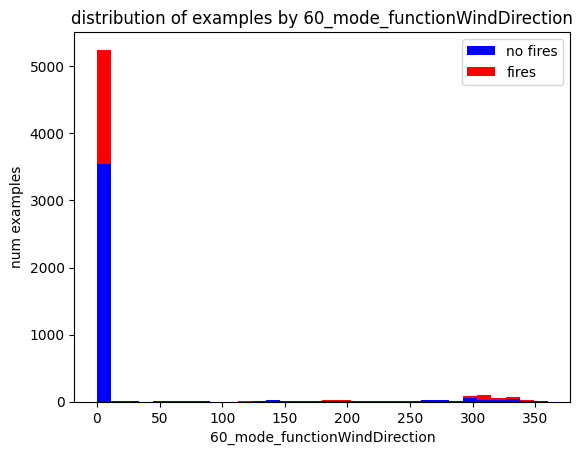

 86%|████████▌ | 24/28 [05:14<00:40, 10.24s/it]

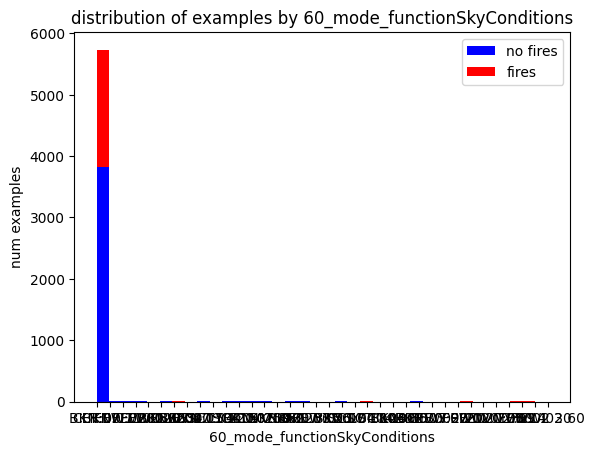

 89%|████████▉ | 25/28 [05:14<00:22,  7.36s/it]

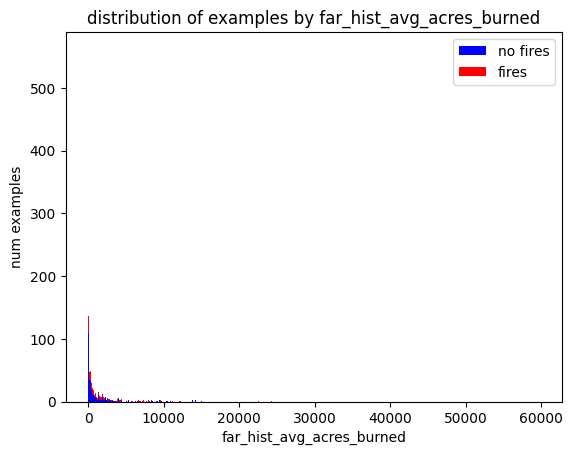

 93%|█████████▎| 26/28 [05:39<00:24, 12.39s/it]

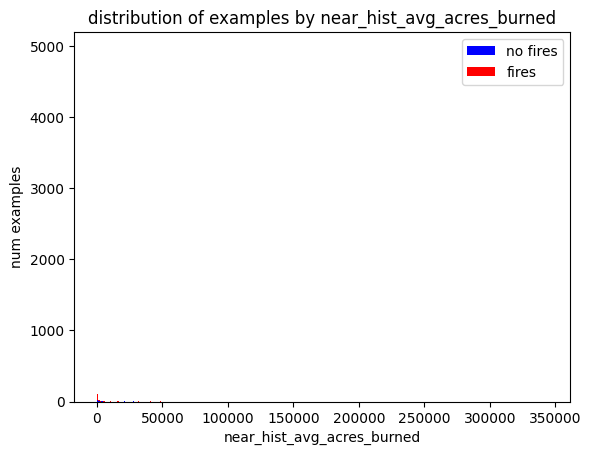

 96%|█████████▋| 27/28 [05:47<00:11, 11.14s/it]

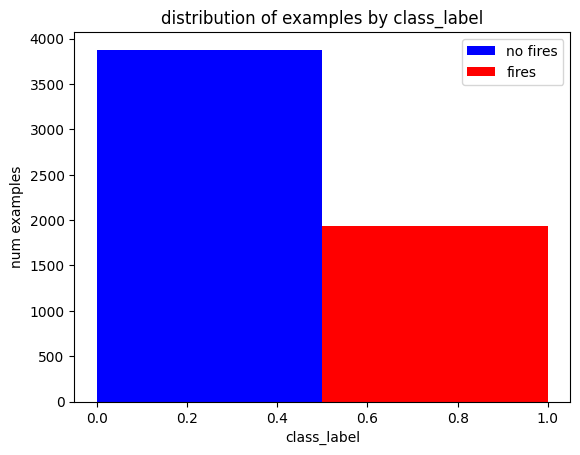

100%|██████████| 28/28 [05:47<00:00, 12.42s/it]


In [16]:
hists_60_ = {}
for label in tqdm(features_60_):
  hists_60_[label] = hist_discrete_feature_distribution_by_label(df, label)

### Correlation

From https://www.w3schools.com/python/pandas/pandas_correlations.asp:
> "The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.
>
> The number varies from -1 to 1.
>
> 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.
>
> 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.
>
> -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.
>
> 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.
>
> What is a good correlation? It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation."

--> We want to keep variables that are NOT strongly correlated with each other.



In [ ]:
# df.corr()  # pearson (linear, continuous)

In [ ]:
# https://medium.com/omics-diary/how-to-calculate-pearson-spearman-and-phik-correlation-between-variables-using-python-3853513ca9c2
full_corr_matrix = df.phik_matrix()
full_corr_matrix

interval columns not set, guessing: ['incident_created_year', 'incident_created_month', 'incident_created_day', 'incident_created_hour', 'incident_created_minute', 'incident_latitude', 'incident_longitude', 'LCD_station_id', 'LCD_station_elevation', 'LCD_station_distance', 'GHCN_station_elevation', 'GHCN_station_distance', 'sumPrecipitation', 'dist_sumPrecipitation', 'maxDryBulbTemperature', 'dist_maxDryBulbTemperature', 'minDryBulbTemperature', 'dist_minDryBulbTemperature', 'meanDryBulbTemperature', 'dist_meanDryBulbTemperature', 'meanDewPointTemperature', 'dist_meanDewPointTemperature', 'meanWetBulbTemperature', 'dist_meanWetBulbTemperature', 'meanWindSpeed', 'dist_meanWindSpeed', 'meanRelativeHumidity', 'dist_meanRelativeHumidity', 'minRelativeHumidity', 'dist_minRelativeHumidity', 'maxRelativeHumidity', 'dist_maxRelativeHumidity', 'maxWindSpeed', 'dist_maxWindSpeed', 'calculate_circular_meanWindDirection', 'dist_calculate_circular_meanWindDirection', 'mode_functionWindDirection', '

/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable incident_geohash is large: 4114. Are you sure this is not an interval variable? Analysis for pairs of variables including incident_geohash can be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable incident_name is large: 4458. Are you sure this is not an interval variable? Analysis for pairs of variables including incident_name can be slow.
  warnings.warn(


**Correlation matrix (Phi K -- nonlinear, noncontinuous)**

In [17]:
features_for_corr_matrix = ["incident_created_year", "incident_created_month",
                            "incident_created_day", "incident_created_hour",
                            "incident_created_minute", "incident_latitude",
                            "incident_longitude", "sumPrecipitation",
                            "dist_sumPrecipitation", "meanDryBulbTemperature",
                            "dist_meanDryBulbTemperature",
                            "meanDewPointTemperature",
                            "dist_meanDewPointTemperature", "meanWindSpeed",
                            "meanRelativeHumidity", "dist_meanRelativeHumidity",
                            "maxWindSpeed", "dist_mode_functionSkyConditions",
                            "10_sumPrecipitation", "10_meanDryBulbTemperature",
                            "10_meanDewPointTemperature",
                            "10_meanRelativeHumidity", "30_sumPrecipitation",
                            "30_meanDryBulbTemperature",
                            "30_meanDewPointTemperature",
                            "30_meanRelativeHumidity", "60_sumPrecipitation",
                            "60_meanDryBulbTemperature",
                            "60_meanDewPointTemperature",
                            "60_meanRelativeHumidity",
                            "far_hist_avg_acres_burned",
                            "near_hist_avg_acres_burned", "class_label"]

In [18]:
# features_for_corr_matrix = ['incident_created_year', 'incident_created_month',
#                             'incident_created_day', 'incident_created_hour',
#                             'incident_latitude', 'incident_longitude',
#                             'sumPrecipitation', 'sumPrecipitation_station_dist',
#                             'maxDryBulbTemperature', 'maxDryBulbTemperature_station_dist',
#                             '', '',  # 10-day humidity, wet bulb, temp
#                             'far_hist_avg_acres_burned', 'near_hist_avg_acres_burned',
#                             'class_label']
# POSSIBLE OVERFLOW
corr_matrix = df[features_for_corr_matrix].phik_matrix()
corr_matrix

interval columns not set, guessing: ['incident_created_year', 'incident_created_month', 'incident_created_day', 'incident_created_hour', 'incident_created_minute', 'incident_latitude', 'incident_longitude', 'sumPrecipitation', 'dist_sumPrecipitation', 'meanDryBulbTemperature', 'dist_meanDryBulbTemperature', 'meanDewPointTemperature', 'dist_meanDewPointTemperature', 'meanWindSpeed', 'meanRelativeHumidity', 'dist_meanRelativeHumidity', 'maxWindSpeed', 'dist_mode_functionSkyConditions', '10_sumPrecipitation', '10_meanDryBulbTemperature', '10_meanDewPointTemperature', '10_meanRelativeHumidity', '30_sumPrecipitation', '30_meanDryBulbTemperature', '30_meanDewPointTemperature', '30_meanRelativeHumidity', '60_sumPrecipitation', '60_meanDryBulbTemperature', '60_meanDewPointTemperature', '60_meanRelativeHumidity', 'far_hist_avg_acres_burned', 'near_hist_avg_acres_burned', 'class_label']


incident_created_year  \
incident_created_year                         1.000000   
incident_created_month                        0.136425   
incident_created_day                          0.000000   
incident_created_hour                         0.077589   
incident_created_minute                       0.052261   
incident_latitude                             0.000000   
incident_longitude                            0.033766   
sumPrecipitation                              0.056458   
dist_sumPrecipitation                         0.042827   
meanDryBulbTemperature                        0.089347   
dist_meanDryBulbTemperature                   0.017363   
meanDewPointTemperature                       0.115484   
dist_meanDewPointTemperature                  0.039400   
meanWindSpeed                                 0.091716   
meanRelativeHumidity                          0.101884   
dist_meanRelativeHumidity                     0.039400   
maxWindSpeed                                  0.036029   
dist_mode_functionSkyConditions               0.047494   
10_sumPrecipitation                           0.074906   
10_meanDryBulbTemperature                     0.105023   
10_meanDewPointTemperature                    0.137393   
10_meanRelativeHumidity                       0.104048   
30_sumPrecipitation                           0.114522   
30_meanDryBulbTemperature                     0.119031   
30_meanDewPointTemperature                    0.172593   
30_meanRelativeHumidity                       0.139504   
60_sumPrecipitation                           0.127574   
60_meanDryBulbTemperature                     0.097038   
60_meanDewPointTemperature                    0.159916   
60_meanRelativeHumidity                       0.140457   
far_hist_avg_acres_burned                     0.059053   
near_hist_avg_acres_burned                    0.029029   
class_label                                   0.209820   

                                 incident_created_month  incident_created_day  \
incident_created_year                          0.136425              0.000000   
incident_created_month                         1.000000              0.147862   
incident_created_day                           0.147862              1.000000   
incident_created_hour                          0.252130              0.000000   
incident_created_minute                        0.049076              0.056844   
incident_latitude                              0.071196              0.005659   
incident_longitude                             0.113530              0.054875   
sumPrecipitation                               0.092658              0.061581   
dist_sumPrecipitation                          0.087710              0.025517   
meanDryBulbTemperature                         0.672970              0.115039   
dist_meanDryBulbTemperature                    0.085032              0.022705   
meanDewPointTemperature                        0.494610              0.102920   
dist_meanDewPointTemperature                   0.095417              0.020385   
meanWindSpeed                                  0.283807              0.100480   
meanRelativeHumidity                           0.410926              0.055598   
dist_meanRelativeHumidity                      0.095353              0.020006   
maxWindSpeed                                   0.300845              0.064661   
dist_mode_functionSkyConditions                0.100639              0.028465   
10_sumPrecipitation                            0.097438              0.038466   
10_meanDryBulbTemperature                      0.702647              0.089494   
10_meanDewPointTemperature                     0.553662              0.052659   
10_meanRelativeHumidity                        0.452978              0.000000   
30_sumPrecipitation                            0.148643              0.000000   
30_meanDryBulbTemperature                      0.711062              0.075044   
30_meanDewPointTemperature         

In [19]:
def display_corr_matrix(corr_matrix, text=True):
  # https://realpython.com/numpy-scipy-pandas-correlation-python/#correlation
  corr_mat_fig, corr_mat_ax = plt.subplots()
  corr_mat_img = corr_mat_ax.imshow(corr_matrix)
  corr_mat_img.set_clim(-1, 1)
  # corr_mat_ax.grid(False)
  corr_mat_ax.xaxis.set(ticks=range(len(corr_matrix.index)), ticklabels=corr_matrix.index)
  corr_mat_ax.yaxis.set(ticks=range(len(corr_matrix.index)), ticklabels=corr_matrix.index)
  # corr_mat_ax.set_ylim(3.5, -0.5)
  if text:
    for i in range(len(corr_matrix.index)):
      for j in range(len(corr_matrix.index)):
        corr_mat_ax.text(i, j, "{:.2f}".format(corr_matrix.iloc[i, j]), ha="center", va="center", color="red")
  cbar = corr_mat_ax.figure.colorbar(corr_mat_img, ax=corr_mat_ax, format="% .2f")
  corr_mat_fig.set_size_inches(9, 9)
  plt.setp(corr_mat_ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")
  plt.show()

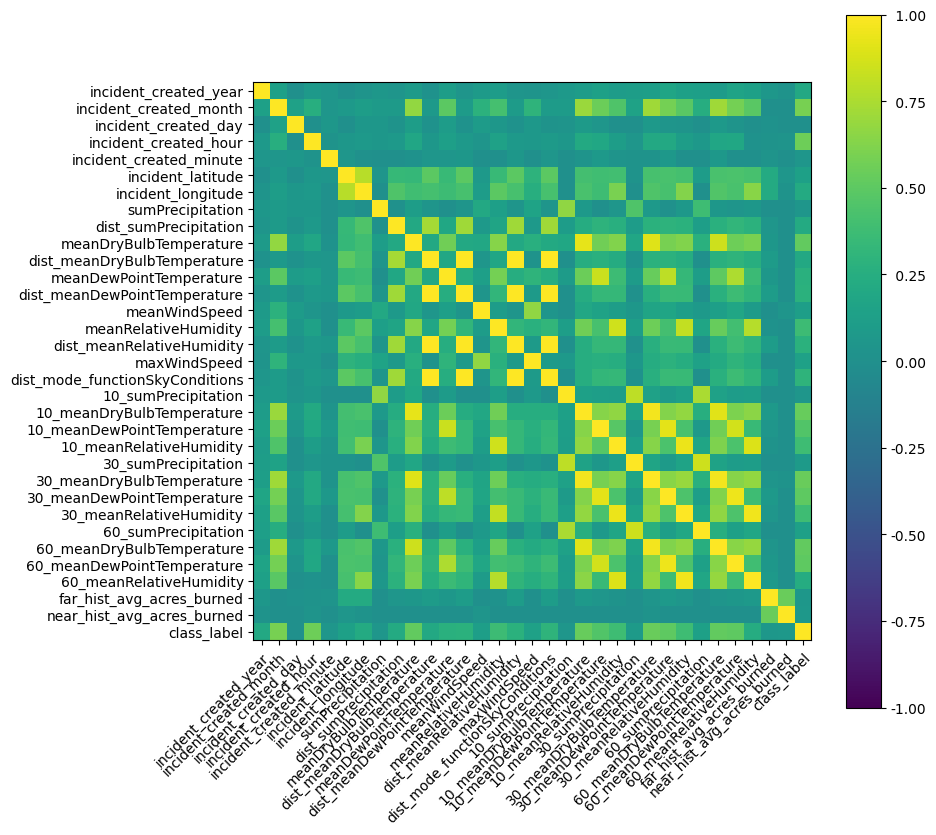

In [20]:
display_corr_matrix(corr_matrix, text=False)

In [21]:
fewer_features_for_corr_matrix = ["incident_created_month",
                                  "incident_created_hour",
                                  "incident_created_minute", "incident_latitude",
                                  "incident_longitude", "sumPrecipitation",
                                  "meanDryBulbTemperature",
                                  "dist_meanDryBulbTemperature",
                                  "meanRelativeHumidity",
                                  "10_sumPrecipitation", "10_meanDryBulbTemperature",
                                  "30_sumPrecipitation",
                                  "30_meanDryBulbTemperature",
                                  "60_sumPrecipitation",
                                  "60_meanDryBulbTemperature",
                                  "far_hist_avg_acres_burned",
                                  "near_hist_avg_acres_burned", "class_label"]
smaller_corr_matrix = df[fewer_features_for_corr_matrix].phik_matrix()

interval columns not set, guessing: ['incident_created_month', 'incident_created_hour', 'incident_created_minute', 'incident_latitude', 'incident_longitude', 'sumPrecipitation', 'meanDryBulbTemperature', 'dist_meanDryBulbTemperature', 'meanRelativeHumidity', '10_sumPrecipitation', '10_meanDryBulbTemperature', '30_sumPrecipitation', '30_meanDryBulbTemperature', '60_sumPrecipitation', '60_meanDryBulbTemperature', 'far_hist_avg_acres_burned', 'near_hist_avg_acres_burned', 'class_label']


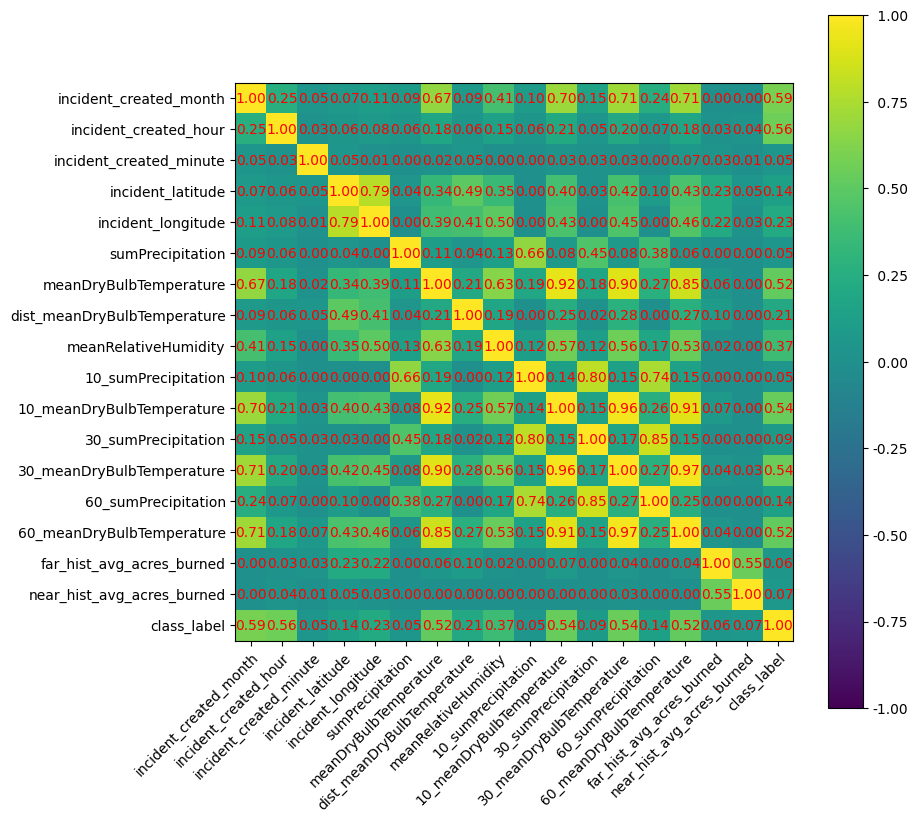

In [22]:
display_corr_matrix(smaller_corr_matrix)

In [ ]:
# df.global_phik()    # LinAlgError: SVD did not converge

In [ ]:
# df.significance_matrix()

### Plot features to class

In [23]:
def scatterplot_features_against_class(df, horiz_feature, vert_feature):
  ax = df[df.class_label == 0].plot(kind="scatter", x=horiz_feature, y=vert_feature, color="b", label="Non-Fire")
  df[df.class_label == 1].plot(kind="scatter", x=horiz_feature, y=vert_feature, ax=ax, color="r", label="Fire")
  ax.set_xlabel(horiz_feature)
  ax.set_ylabel(vert_feature)
  plt.show()

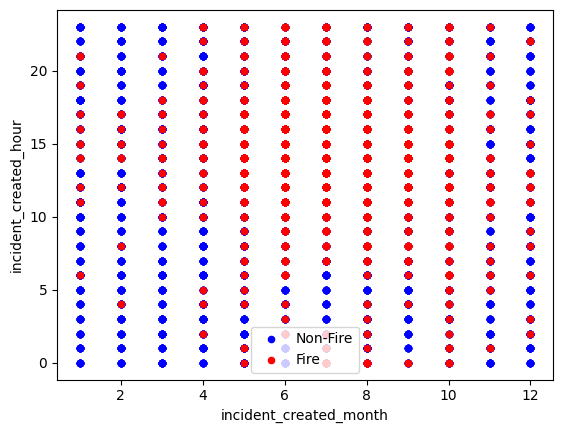

In [24]:
scatterplot_features_against_class(df, "incident_created_month", "incident_created_hour")

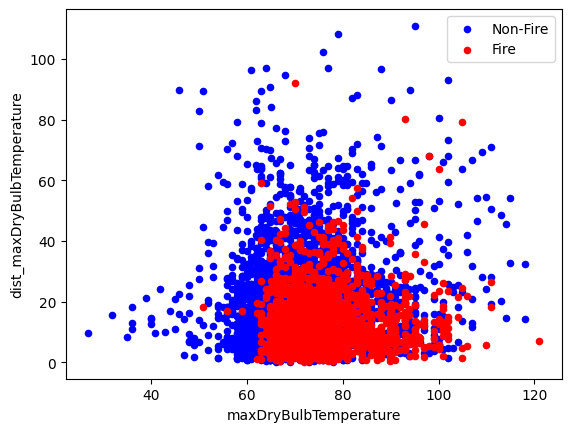

In [25]:
scatterplot_features_against_class(df, "maxDryBulbTemperature", "dist_maxDryBulbTemperature")

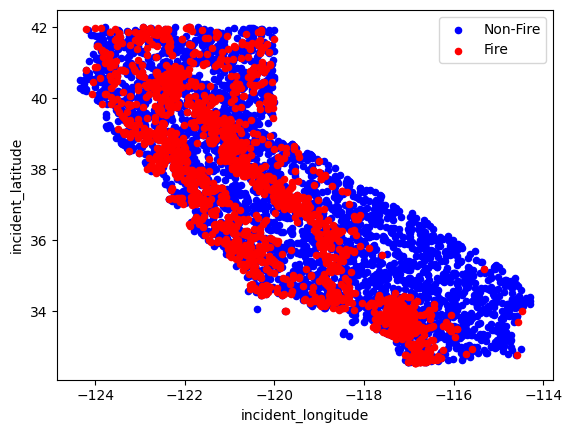

In [26]:
scatterplot_features_against_class(df, "incident_longitude", "incident_latitude")

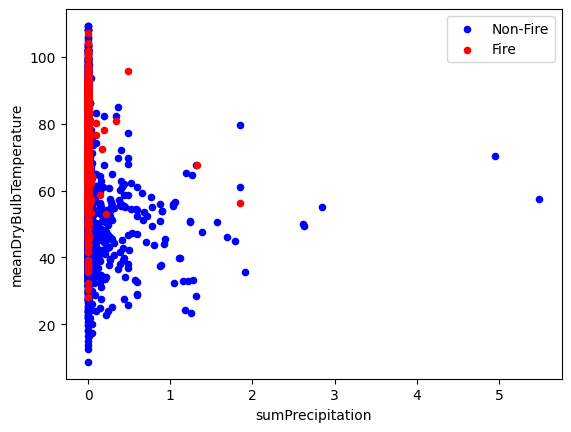

In [27]:
scatterplot_features_against_class(df, "sumPrecipitation", "meanDryBulbTemperature")

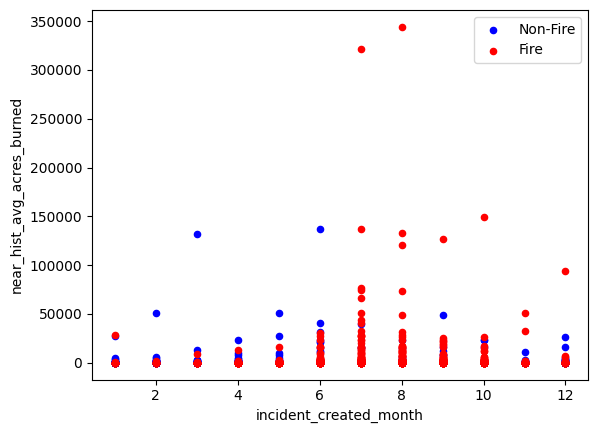

In [28]:
scatterplot_features_against_class(df, "incident_created_month", "near_hist_avg_acres_burned")

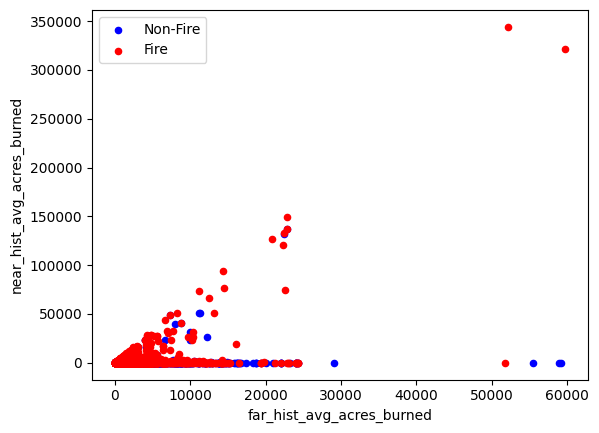

In [29]:
scatterplot_features_against_class(df, "far_hist_avg_acres_burned", "near_hist_avg_acres_burned")

In [30]:
def scatterplot_single_feature_against_class(df, feature):
  ax = df.plot(kind="scatter", x=feature, y="class_label")
  ax.set_xlabel(feature)
  ax.yaxis.set(ticks=[0, 1], ticklabels=["No Fire", "Fire"])
  plt.show()

In [31]:
print(df.columns)

Index(['incident_name', 'incident_created_year', 'incident_created_month',
       'incident_created_day', 'incident_created_hour',
       'incident_created_minute', 'incident_latitude', 'incident_longitude',
       'incident_geohash', 'LCD_station_id', 'LCD_station_elevation',
       'LCD_station_distance', 'GHCN_station_id', 'GHCN_station_elevation',
       'GHCN_station_distance', 'sumPrecipitation', 'dist_sumPrecipitation',
       'maxDryBulbTemperature', 'dist_maxDryBulbTemperature',
       'minDryBulbTemperature', 'dist_minDryBulbTemperature',
       'meanDryBulbTemperature', 'dist_meanDryBulbTemperature',
       'meanDewPointTemperature', 'dist_meanDewPointTemperature',
       'meanWetBulbTemperature', 'dist_meanWetBulbTemperature',
       'meanWindSpeed', 'dist_meanWindSpeed', 'meanRelativeHumidity',
       'dist_meanRelativeHumidity', 'minRelativeHumidity',
       'dist_minRelativeHumidity', 'maxRelativeHumidity',
       'dist_maxRelativeHumidity', 'maxWindSpeed', 'dist_maxWind

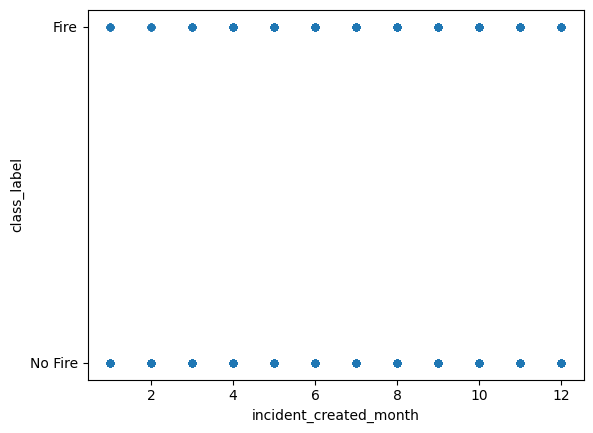

In [32]:
scatterplot_single_feature_against_class(df, "incident_created_month")